In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Sample - Superstore.xls')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### As we see there are no null values

In [6]:
data['delivery_days']=(data['Ship Date']-data['Order Date']).dt.days

### As in the dataste our aim is to build a generalised model than a specific model so any categories related to specific person can be removed eg: Order Id,Customer Name,Customer ID as these dont contribute in the final sales

In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'delivery_days'],
      dtype='object')

In [8]:
data.drop(['Row ID','Order ID', 'Order Date','Product ID', 'Ship Date','Customer ID','Customer Name'],axis=1,inplace=True)

In [9]:
for columns in data.columns:
    print(f"The total no of unique items in {columns} are {data[columns].nunique()}")

The total no of unique items in Ship Mode are 4
The total no of unique items in Segment are 3
The total no of unique items in Country are 1
The total no of unique items in City are 531
The total no of unique items in State are 49
The total no of unique items in Postal Code are 631
The total no of unique items in Region are 4
The total no of unique items in Category are 3
The total no of unique items in Sub-Category are 17
The total no of unique items in Product Name are 1850
The total no of unique items in Sales are 6144
The total no of unique items in Quantity are 14
The total no of unique items in Discount are 12
The total no of unique items in Profit are 7545
The total no of unique items in delivery_days are 8


#### As there is only 1 country we will drop it

In [10]:
data.drop('Country',axis=1,inplace=True)

### Lets divide the features into categorical and numerical columns

In [11]:
categorical_columns=data.select_dtypes(include='object').columns
categorical_columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Product Name'],
      dtype='object')

In [12]:
numerical_columns=data.select_dtypes(exclude='object').columns
numerical_columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'delivery_days'],
      dtype='object')

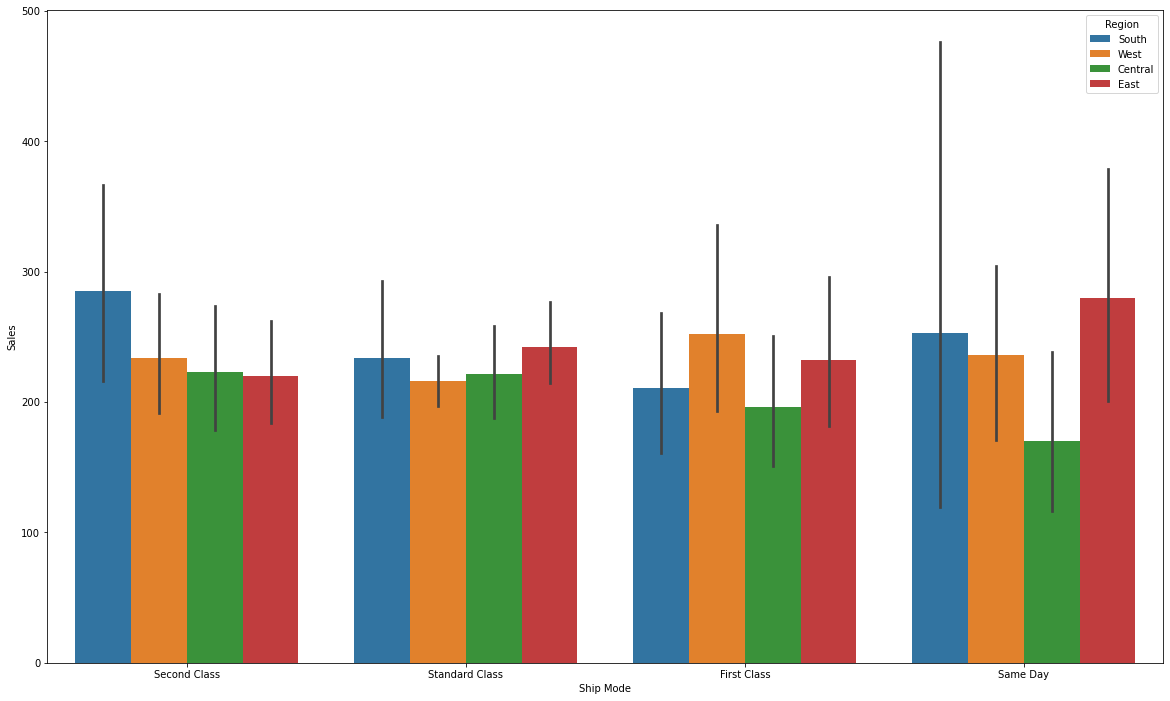

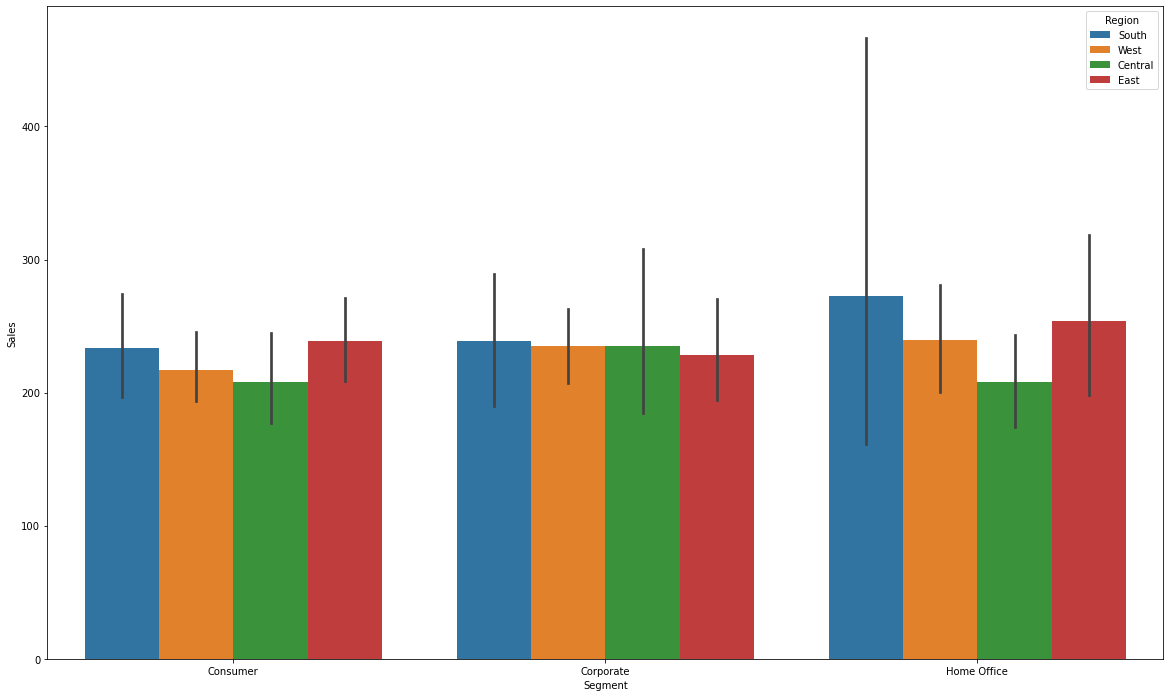

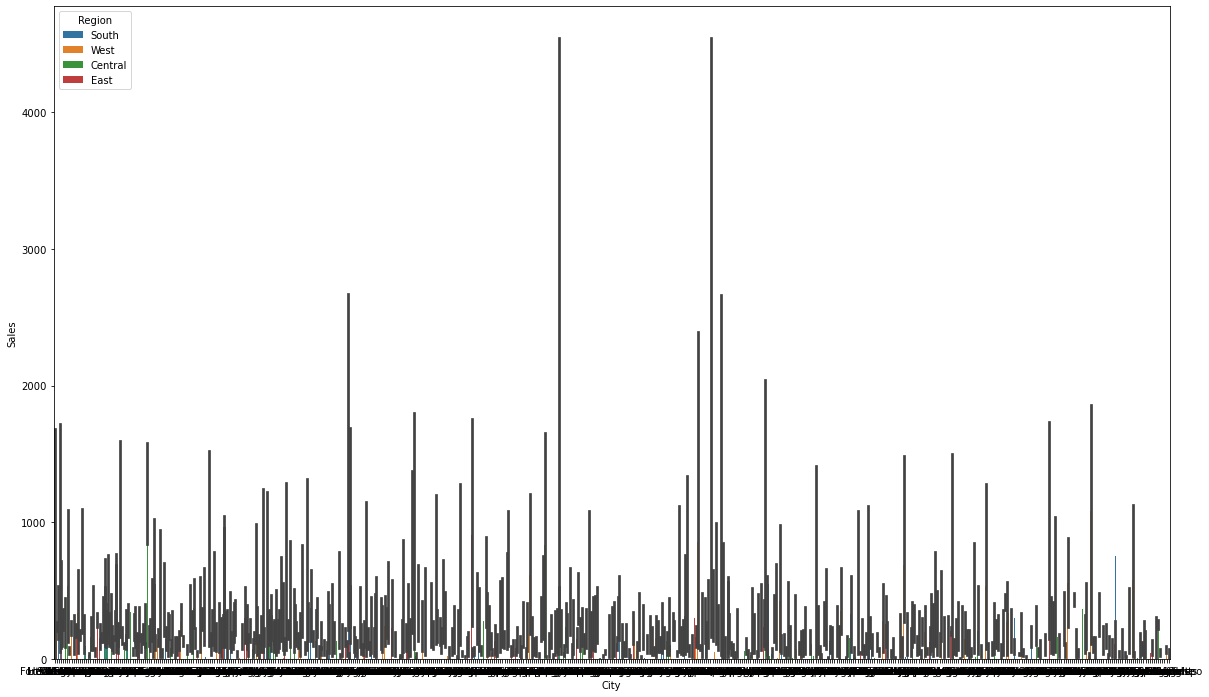

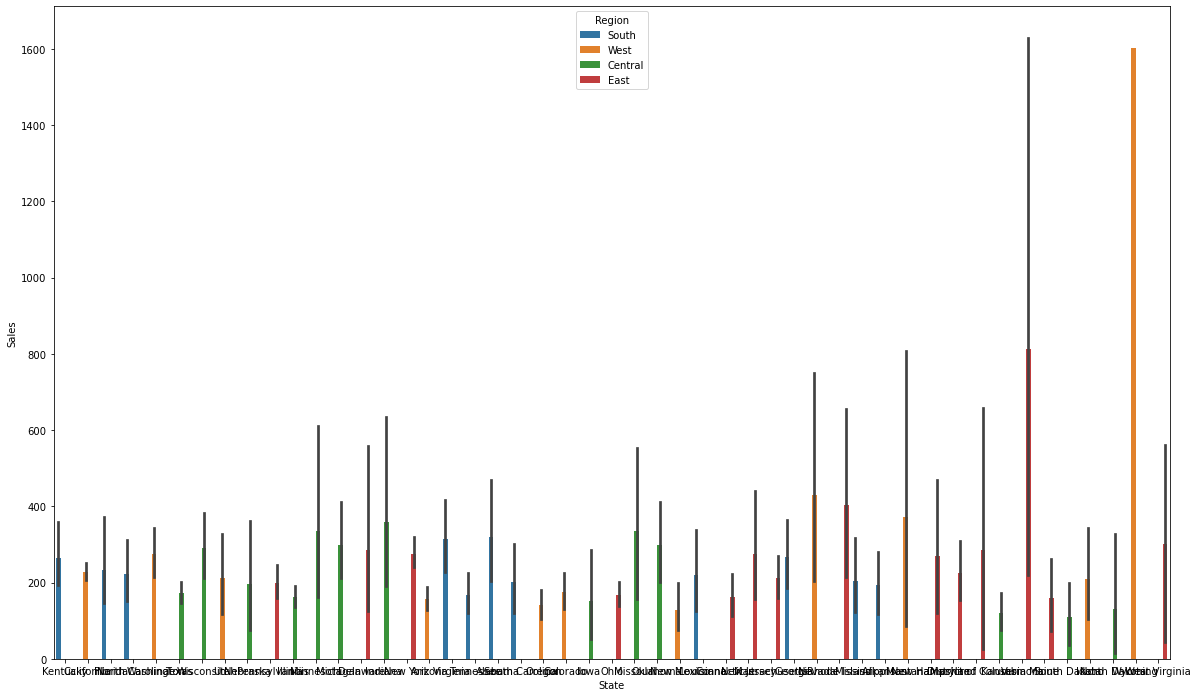

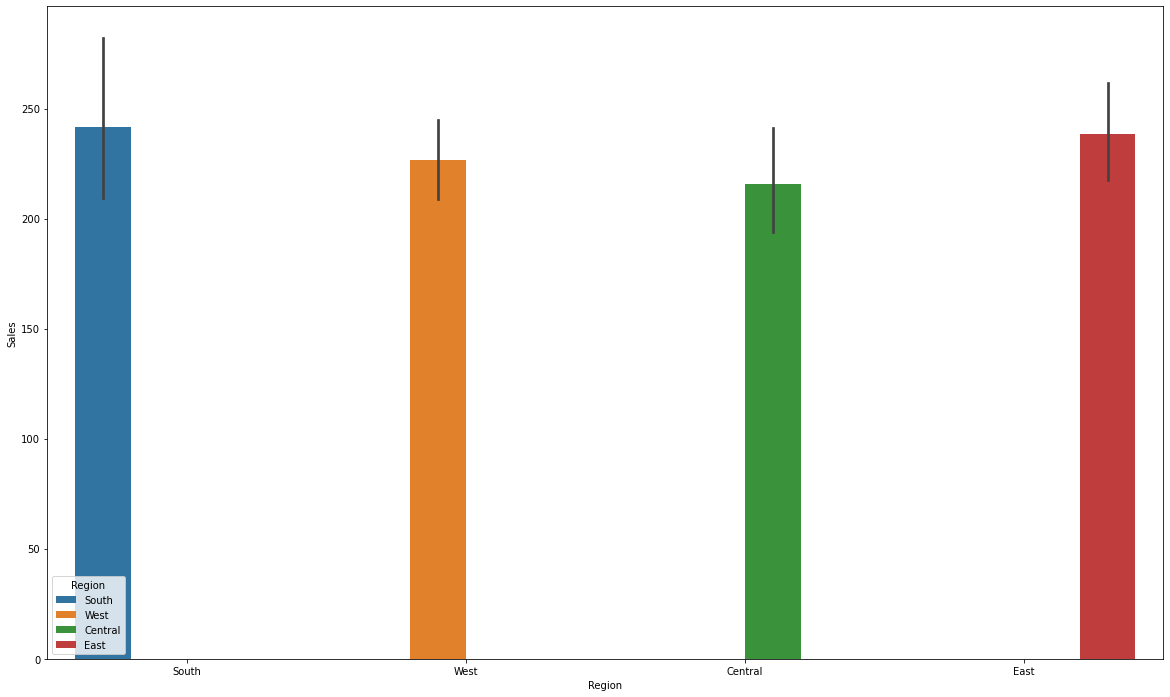

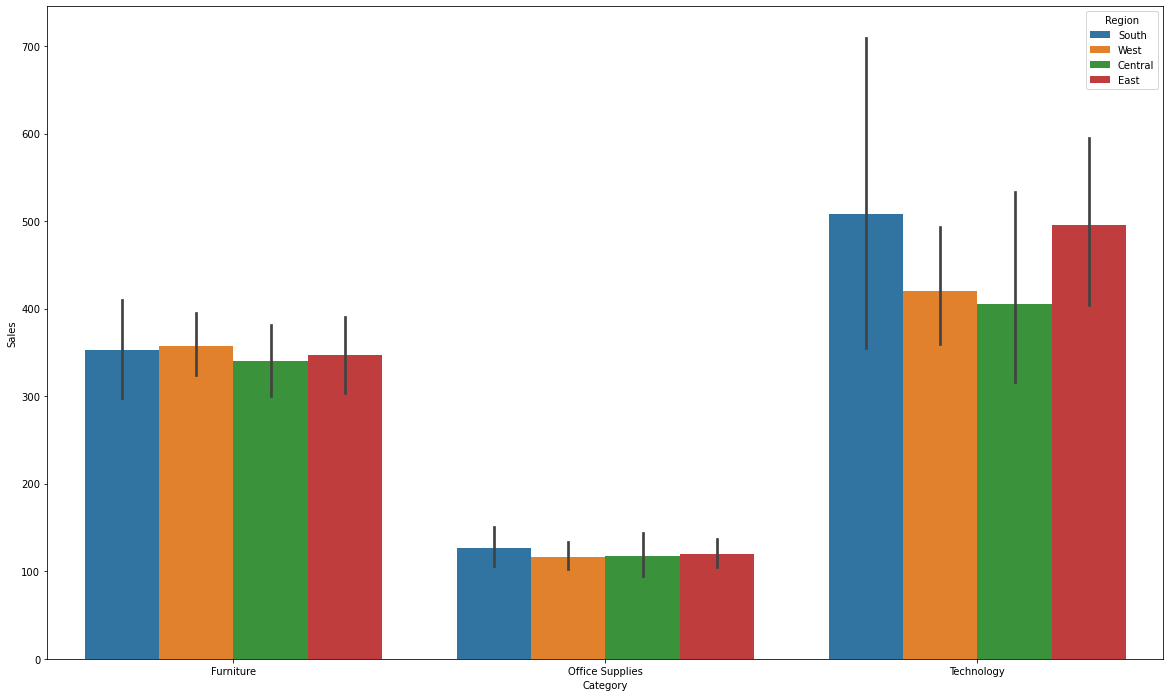

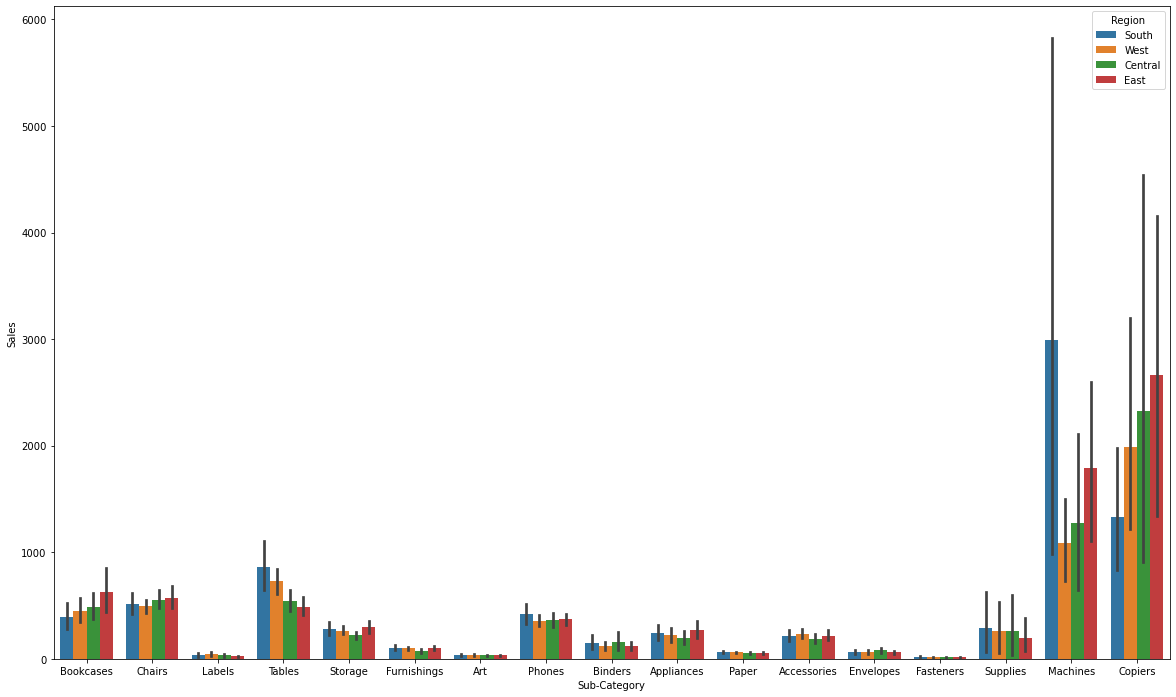

In [13]:
for columns in categorical_columns[:-1]:
    plt.figure(figsize=(20,12))
    sns.barplot(data=data,x=columns,y='Sales',hue='Region')
    plt.show()

<AxesSubplot:>

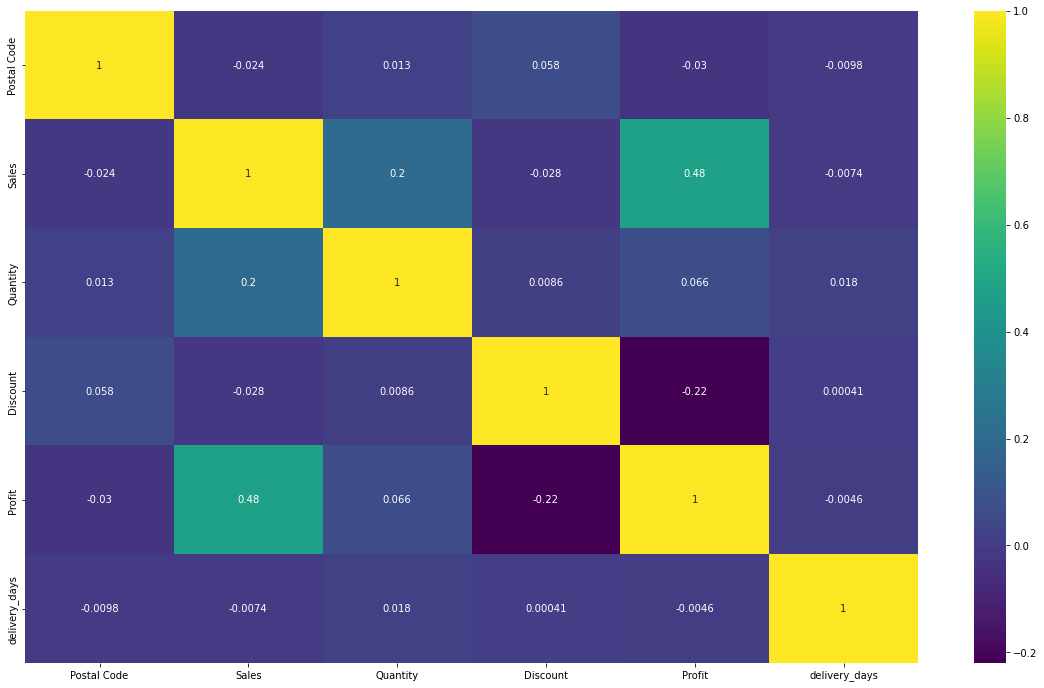

In [14]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

### As we see there isnt much correlation between the different attributes  barring the Postal code as it is a discrete variable

In [15]:
categorical_columns.drop(['City','State'])

Index(['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category',
       'Product Name'],
      dtype='object')

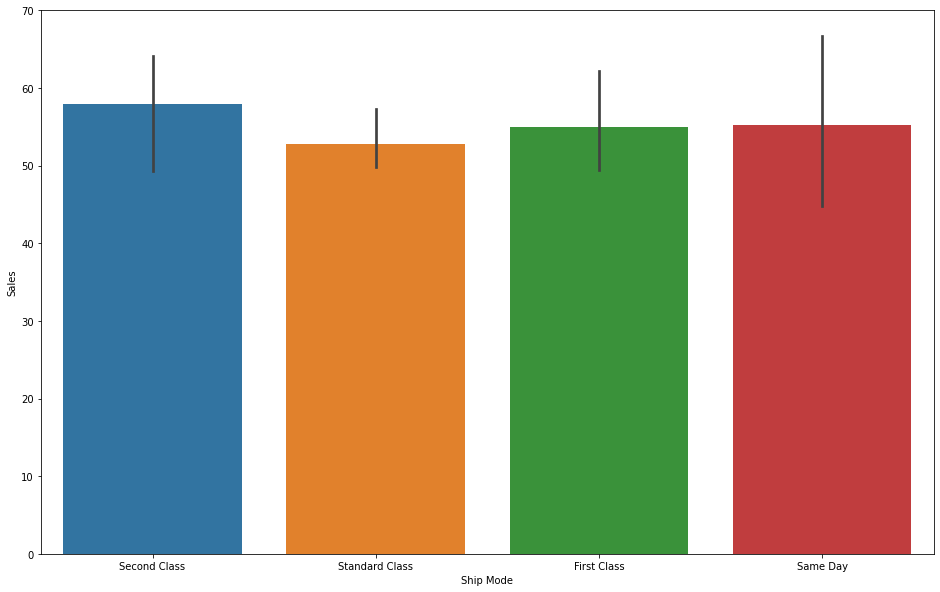

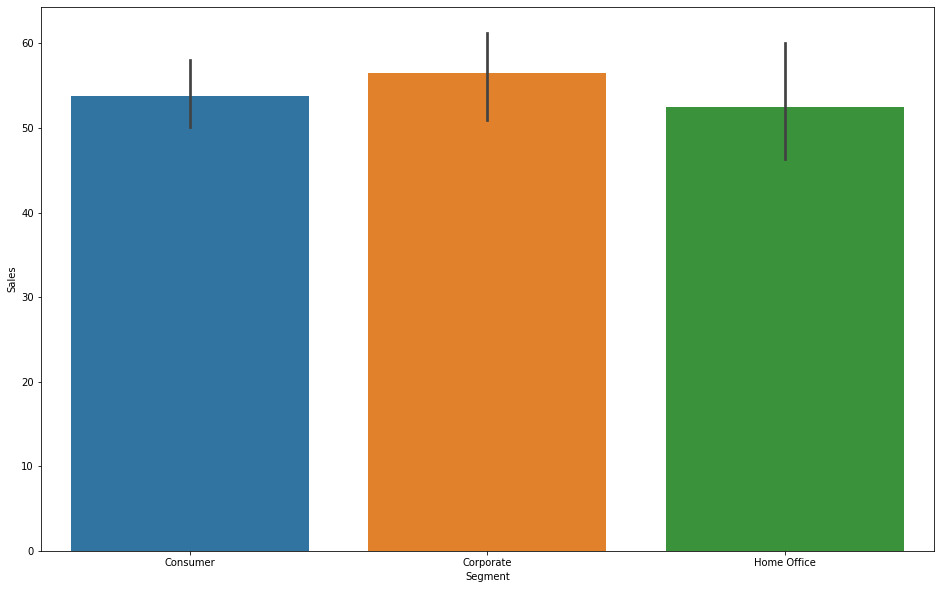

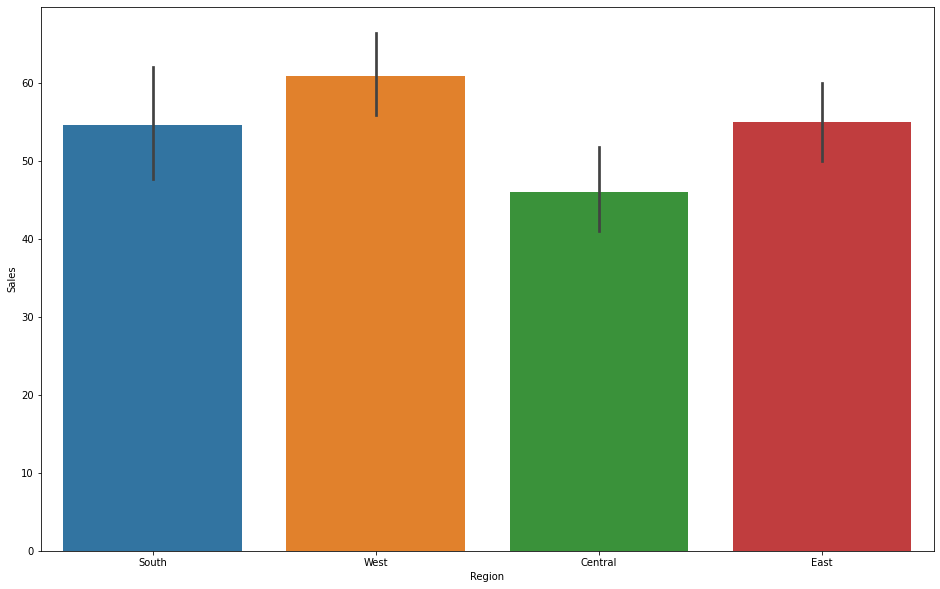

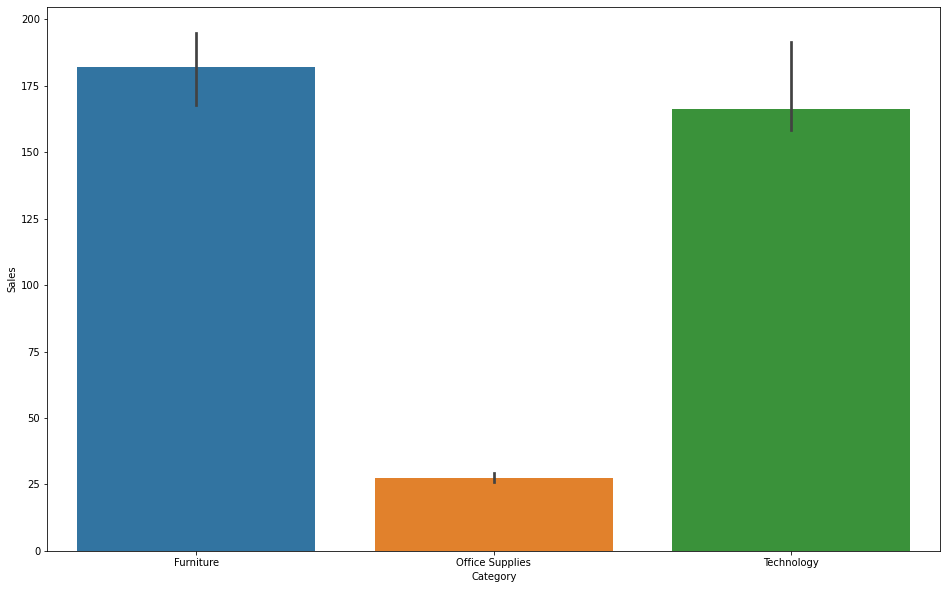

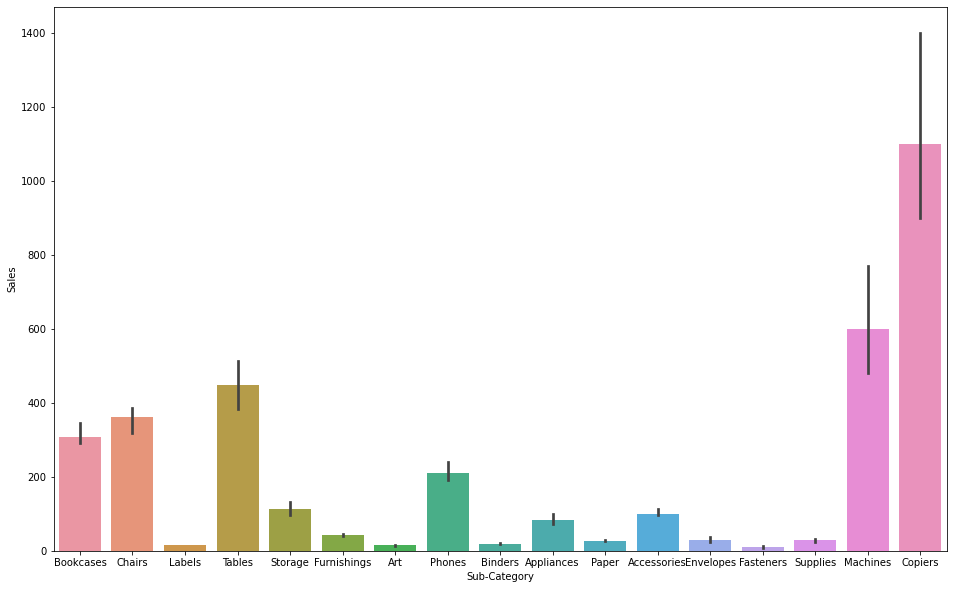

In [16]:
for column in categorical_columns.drop(['City','State','Product Name']):
    plt.figure(figsize=(16,10))
    sns.barplot(data=data,x=column,y='Sales',estimator=np.median)
    plt.show()

### Inferences for different categories on Sales
 1. Different Shipping modes dont have much influence on the Sales but Same day delivery has generated more sales
 2. Different Customer Segments dont have much influence on the Sales but Home office has slightly better Sales
 3. Different Regions dont have much influence on the Sales there is very less difference but South region does have better Sales
 4. Different Categories have different sales and Technology has better sales compared to Furniture Supplies
 5. Different Sub Categories have different sales and Copiers and Machines have better sales compared to other sub categories

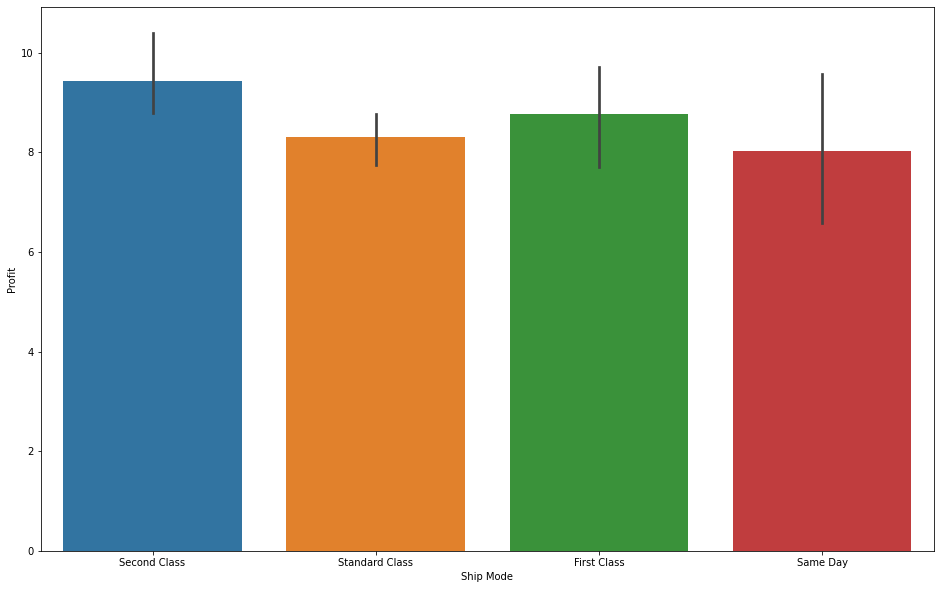

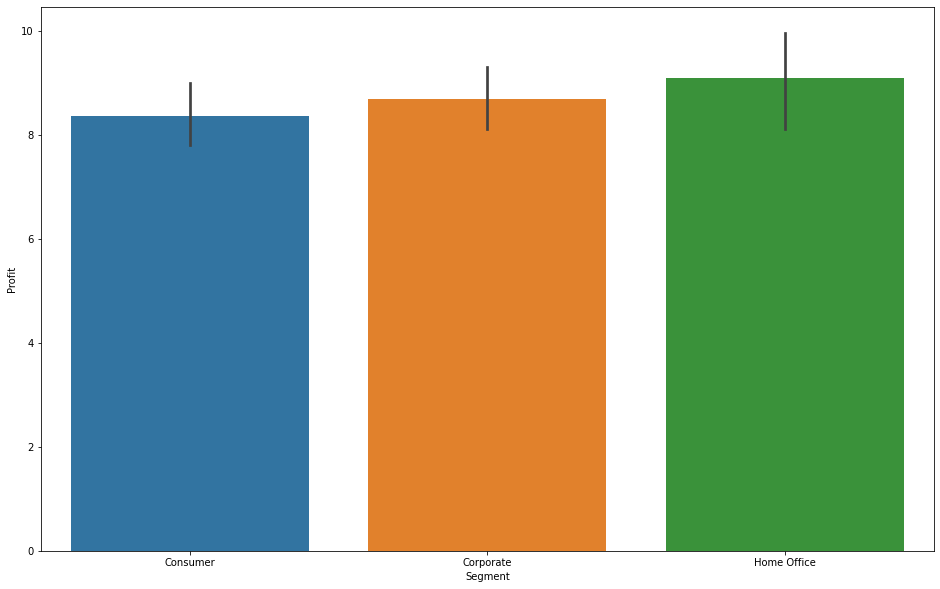

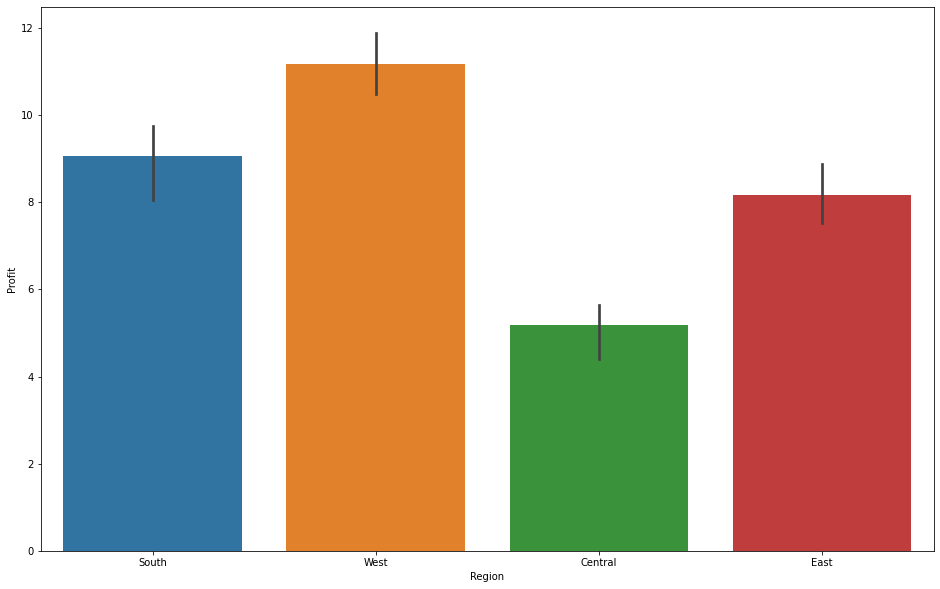

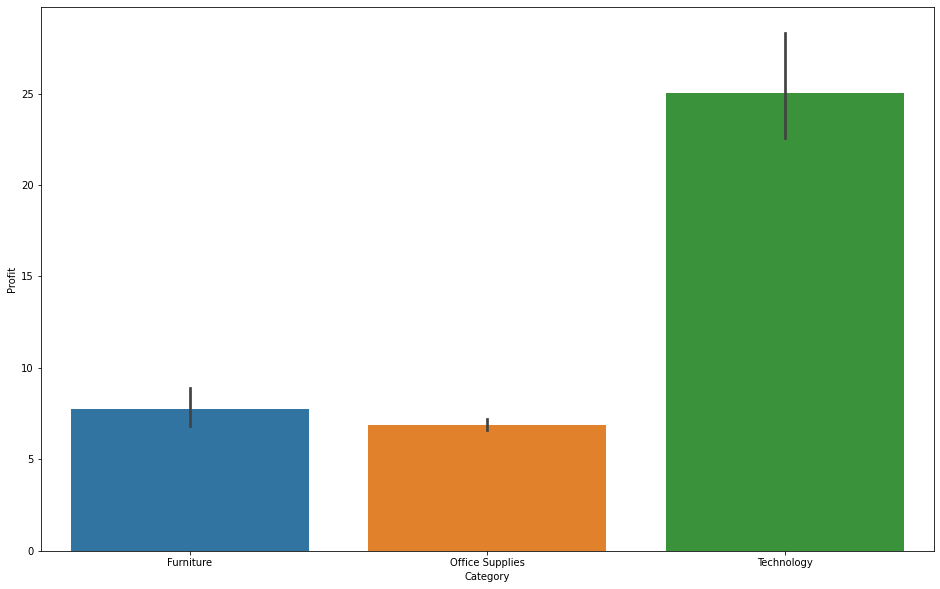

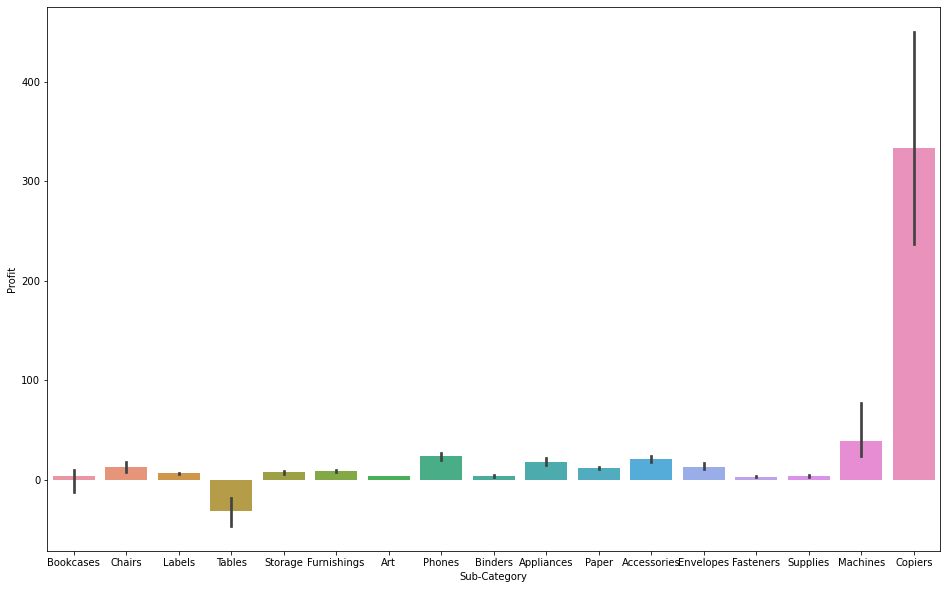

In [17]:
for column in categorical_columns.drop(['City','State','Product Name']):
    plt.figure(figsize=(16,10))
    sns.barplot(data=data,x=column,y='Profit',estimator=np.median)
    plt.show()

### Inferences for different categories on Profit
 1. Major profits are incured in First class and Same day delivery for shipping modes
 2. Different Customer Segments have generated varied profits with home office generating consistent proifts
 3. Different Regions are generating varied profits with West and East performing better and central not performing better so its good to focus less on Central
 4. Different Categories have different Profits and Technology has better Profits compared to Office and Furniture adn focus should be more on Technolgy
 5. Different Sub Categories have different Profits and Copiers are generating consistent profits as opposed to Machines which are incuring losses eventhough sales of Machines is good the profits arent good

In [18]:
data[categorical_columns]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5"""


In [19]:
def plot_curve(df,column,y):
    fig,axes=plt.subplots(2,3,figsize=(20,10))
    fig.suptitle(f"plot for {column}")
    sns.axisgrid
    sns.barplot(ax=axes[0,0],data=df,x=column,y=y,hue=categorical_columns[0],estimator=np.median) 
    sns.barplot(ax=axes[0,1],data=df,x=column,y=y,hue=categorical_columns[1],estimator=np.median)
    # sns.barplot(ax=axes[0,0],data=df,x=column,y=y,hue=categorical_columns[2])
    # sns.barplot(ax=axes[0,0],data=df,x=column,y=y,hue=categorical_columns[3])
    sns.barplot(ax=axes[0,2],data=df,x=column,y=y,hue=categorical_columns[4],estimator=np.median)
    sns.barplot(ax=axes[1,0],data=df,x=column,y=y,hue=categorical_columns[5],estimator=np.median)
    sns.barplot(ax=axes[1,1],data=df,x=column,y=y,hue=categorical_columns[6],estimator=np.median)

In [52]:
categorical_columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Product Name'],
      dtype='object')

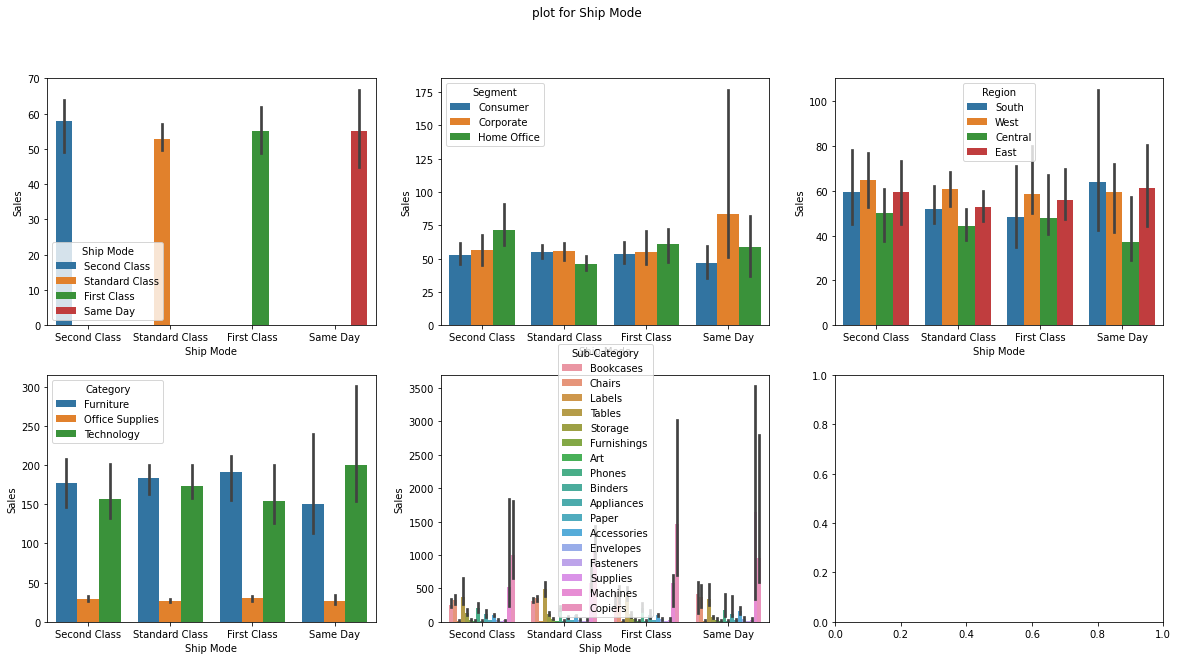

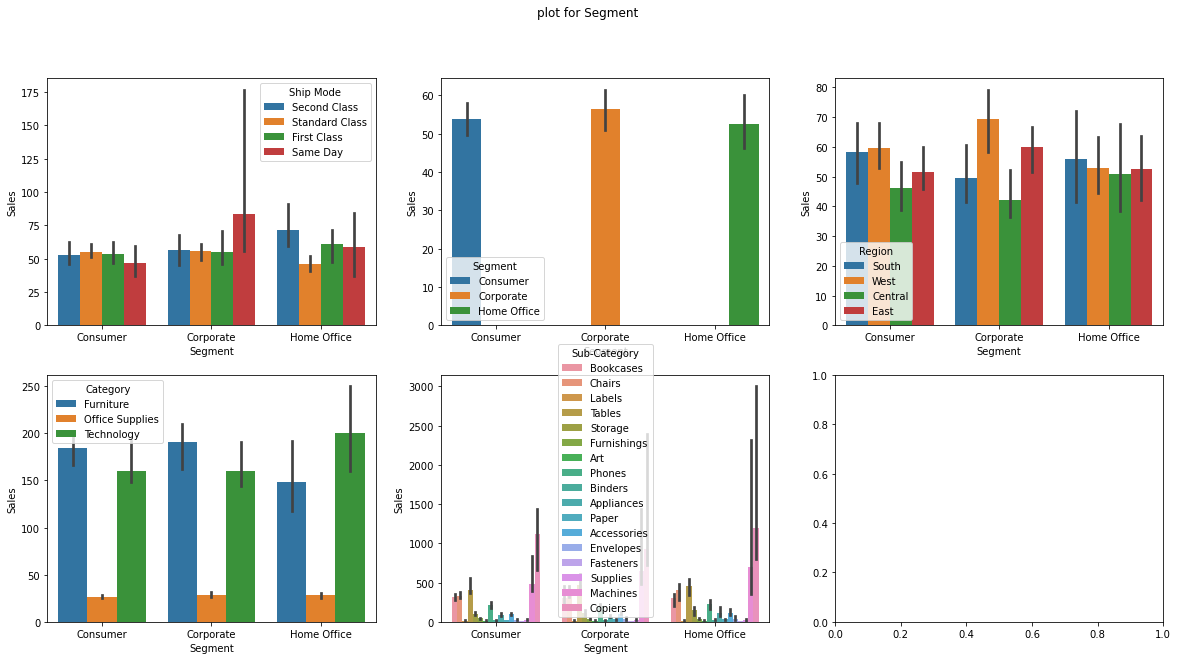

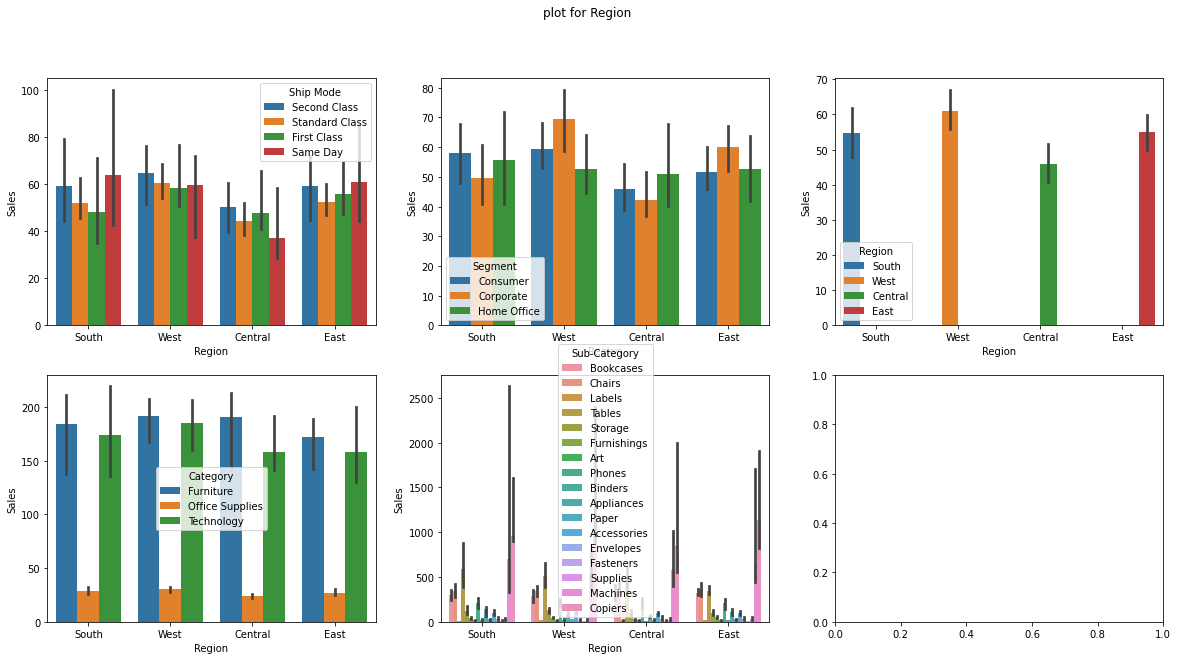

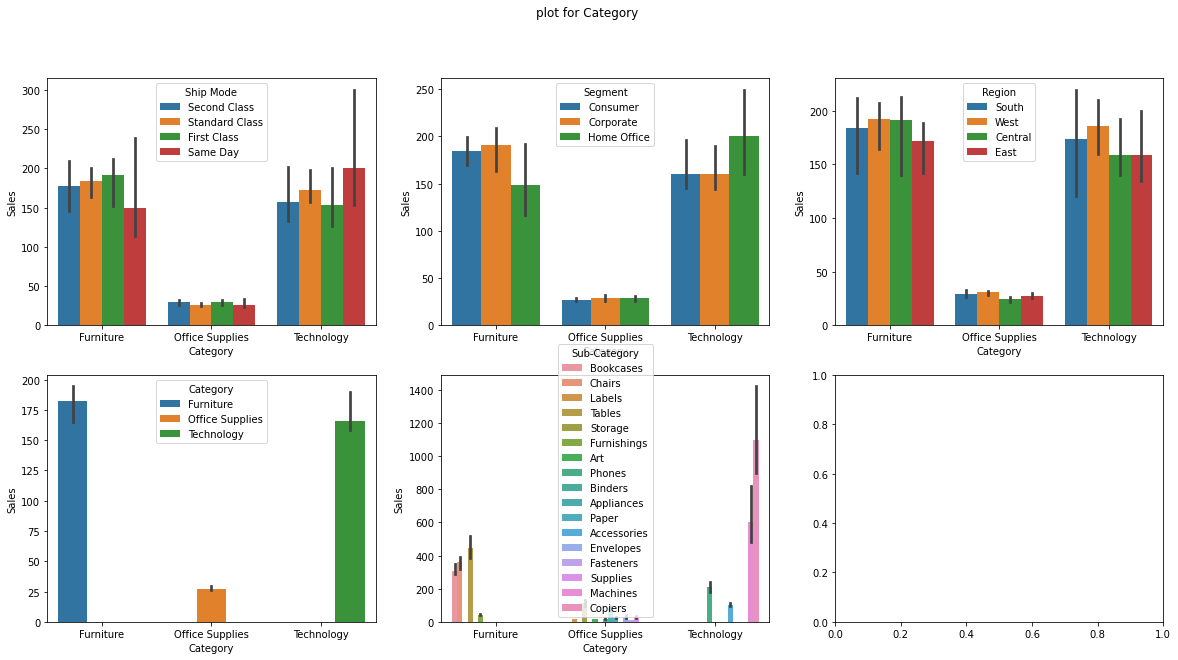

In [20]:
for column in categorical_columns.drop(['City','State','Product Name','Sub-Category']):
    plot_curve(data,column,'Sales') 

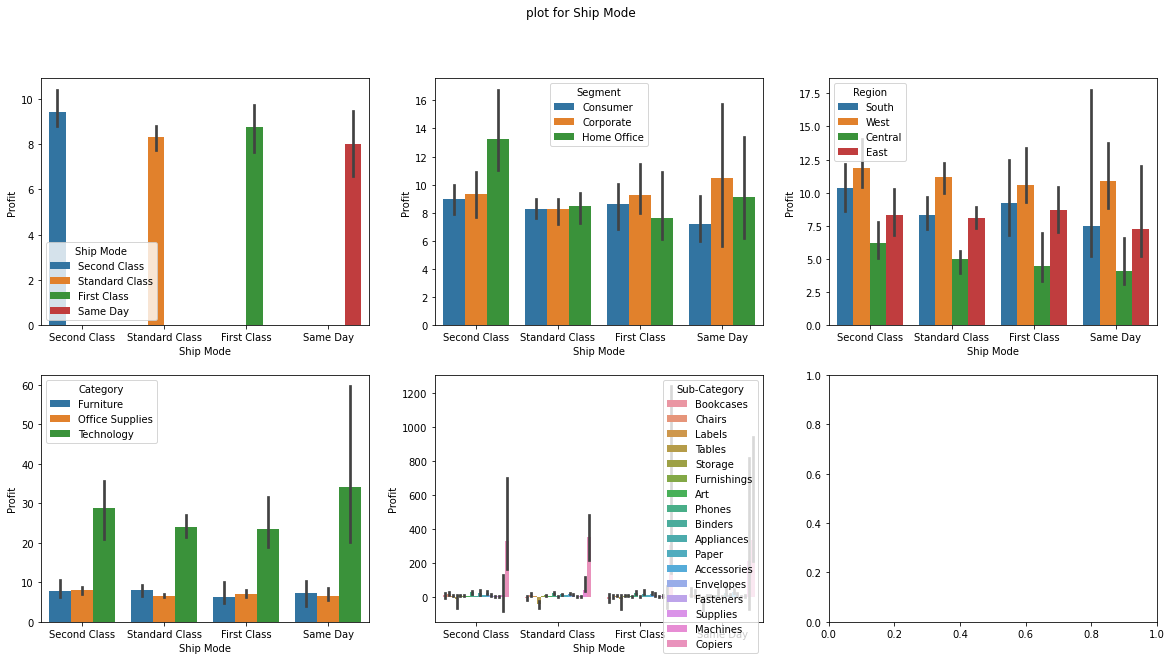

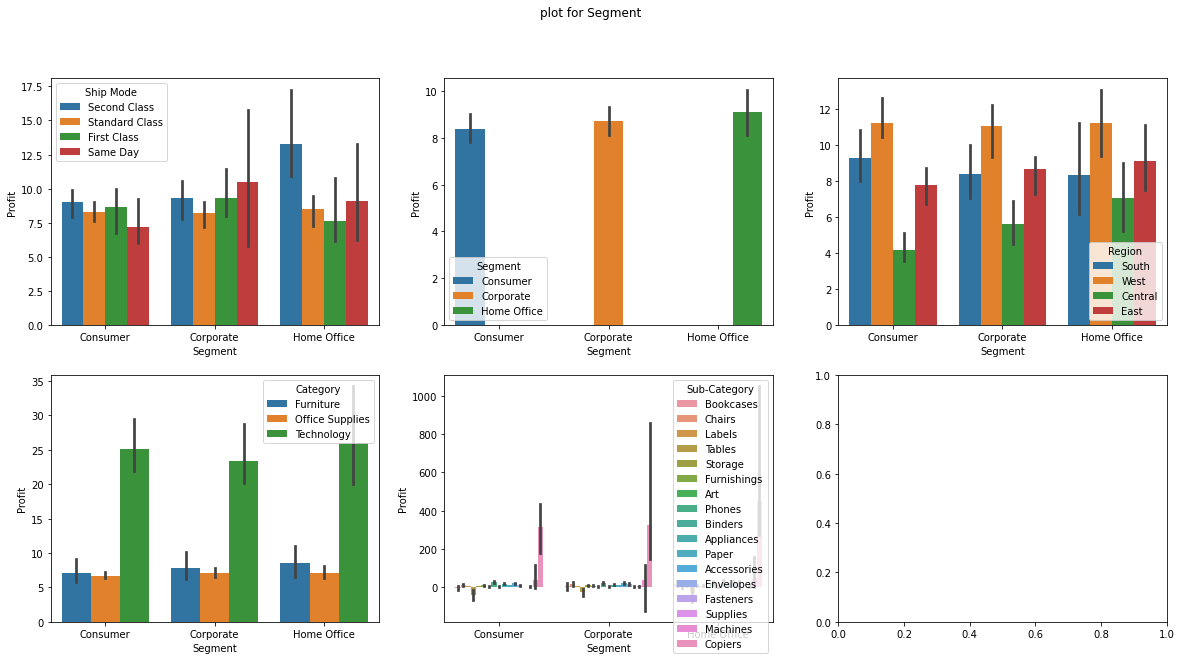

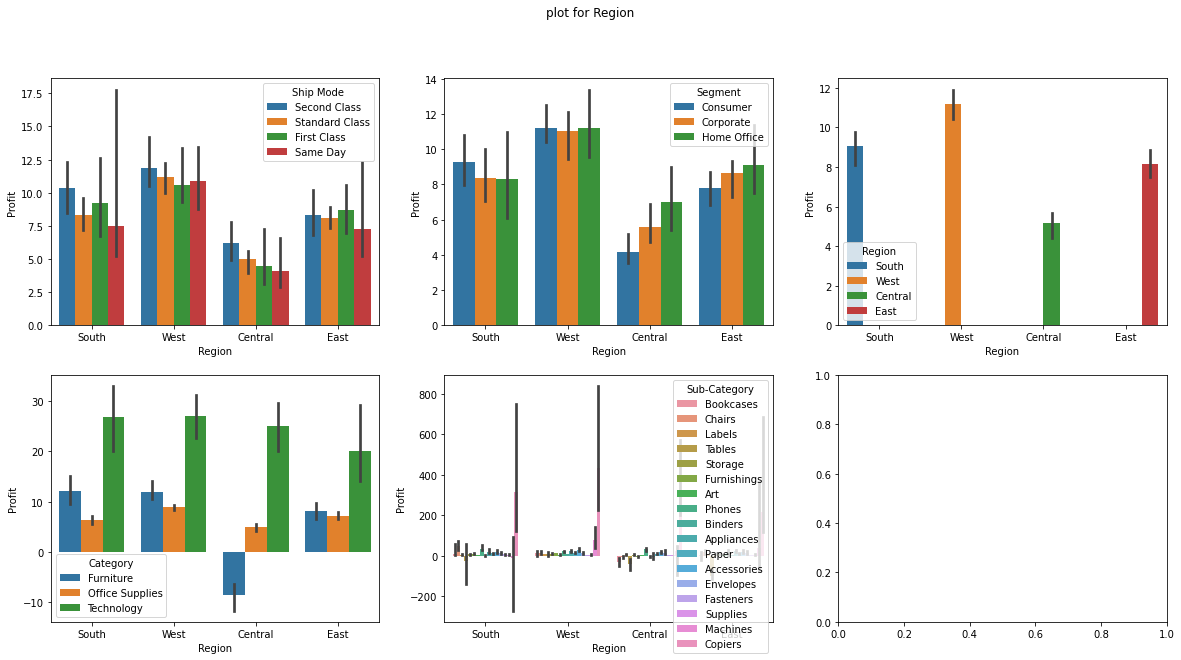

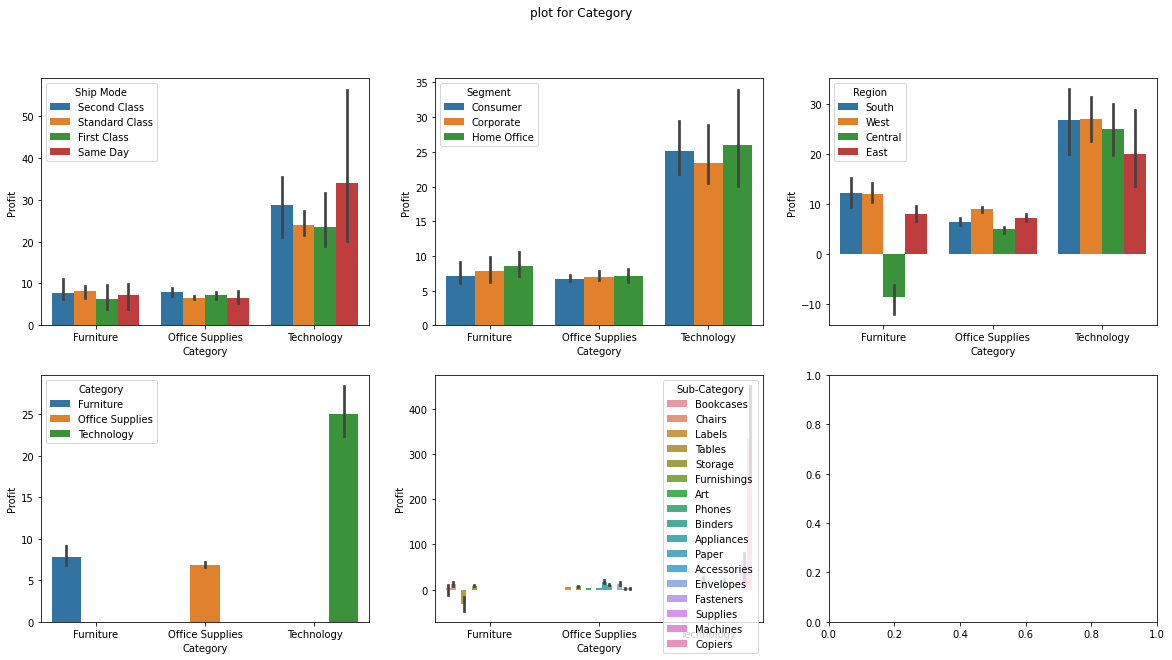

In [21]:
for column in categorical_columns.drop(['City','State','Product Name','Sub-Category']):
    plot_curve(data,column,'Profit') 

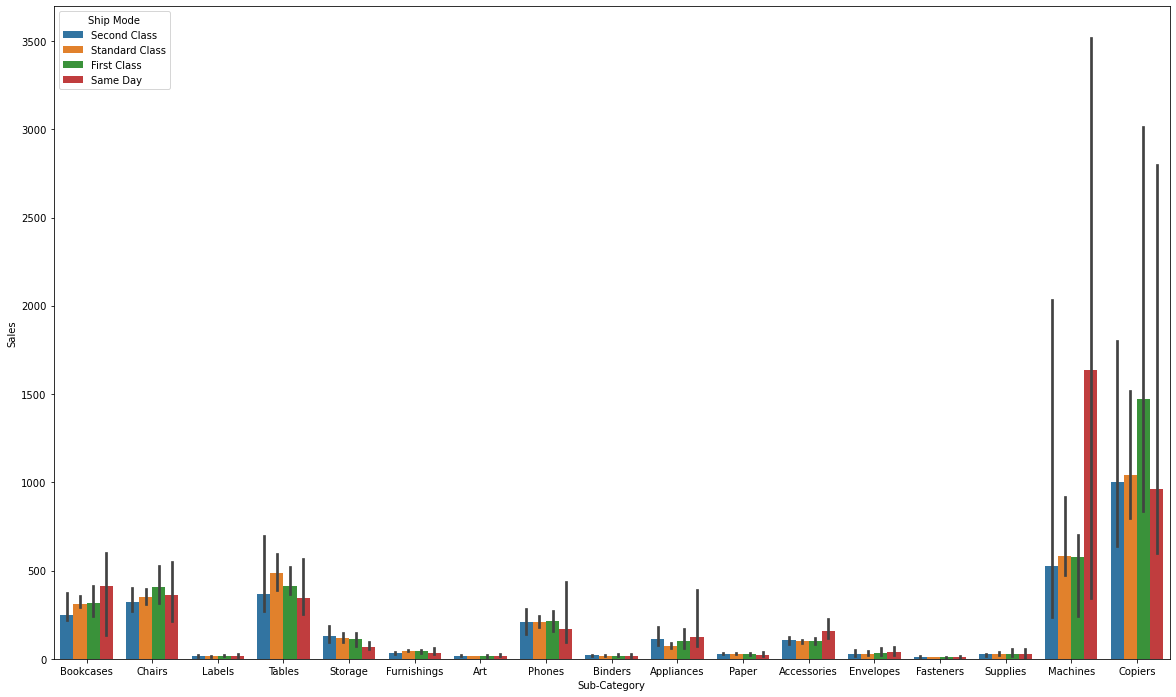

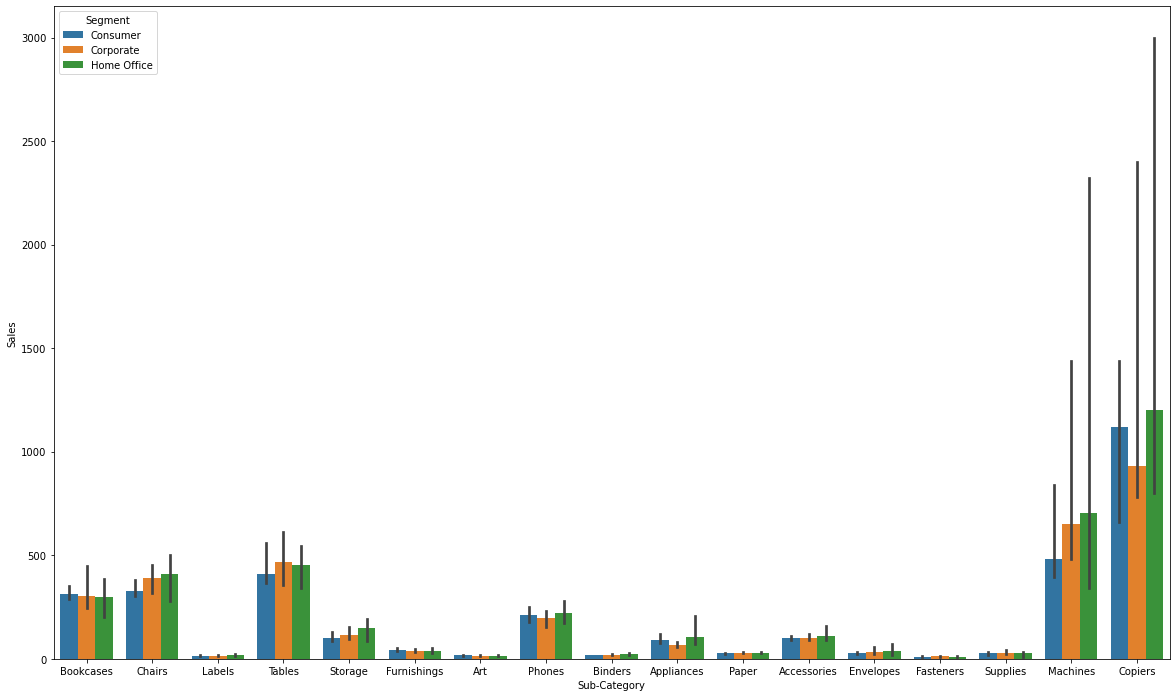

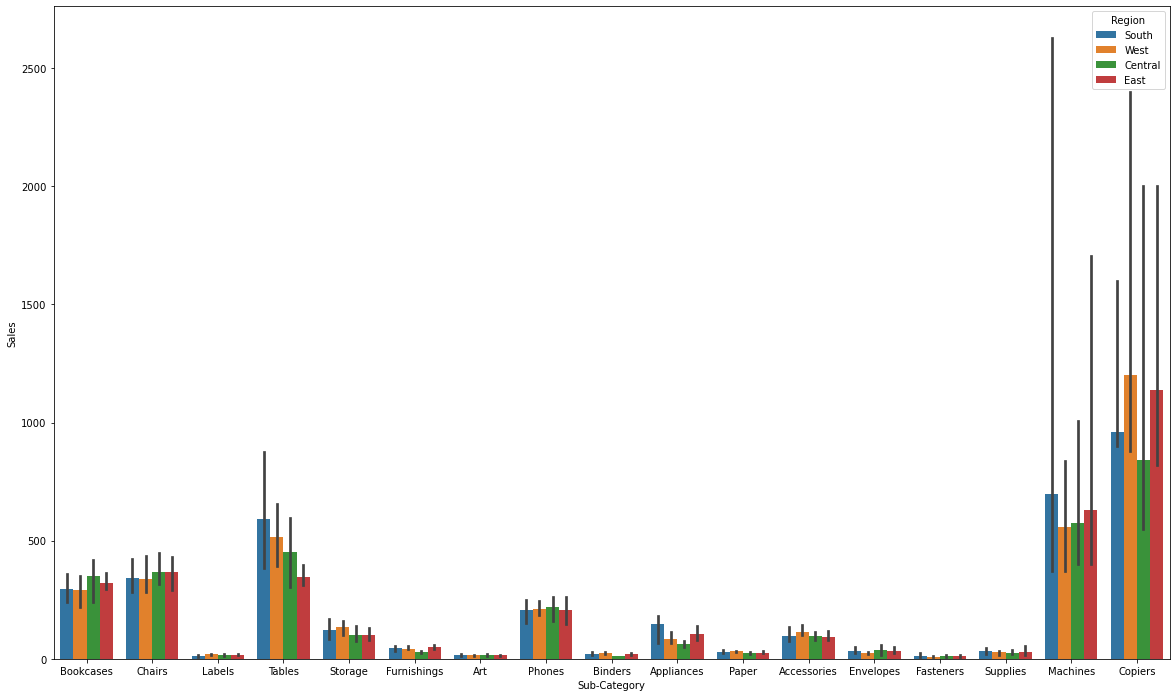

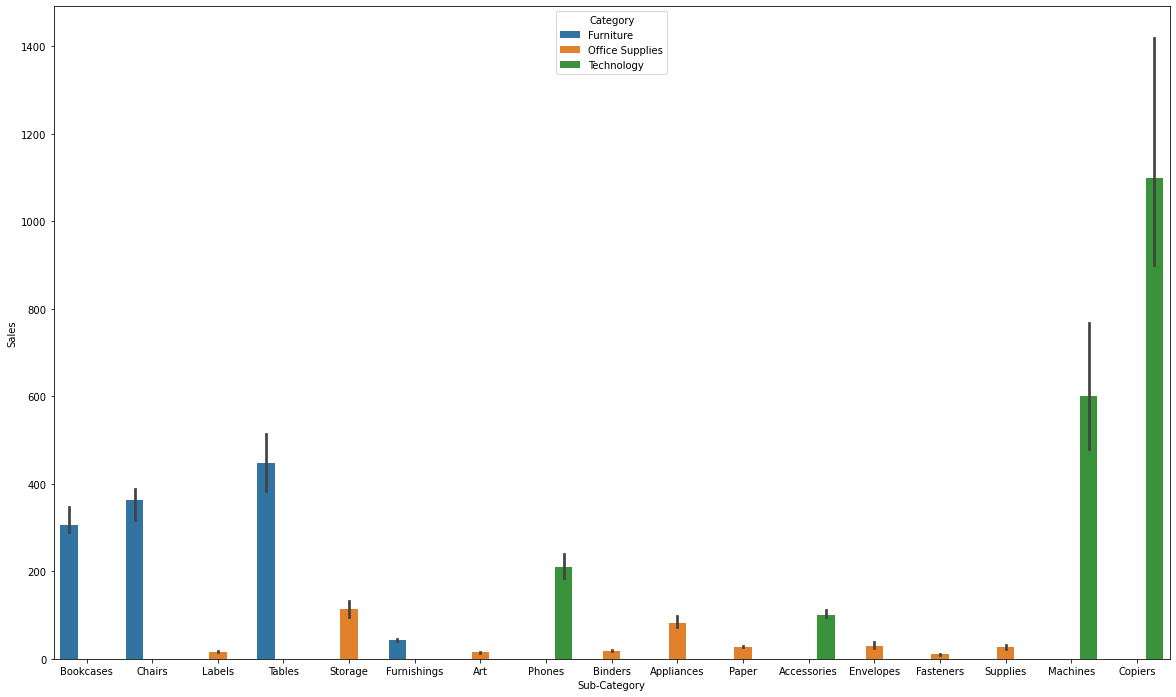

In [22]:
for columns in categorical_columns.drop(['City','State','Product Name','Sub-Category']):
    plt.figure(figsize=(20,12))
    sns.barplot(data=data,x='Sub-Category',y='Sales',hue=columns,estimator=np.median)
    plt.show()

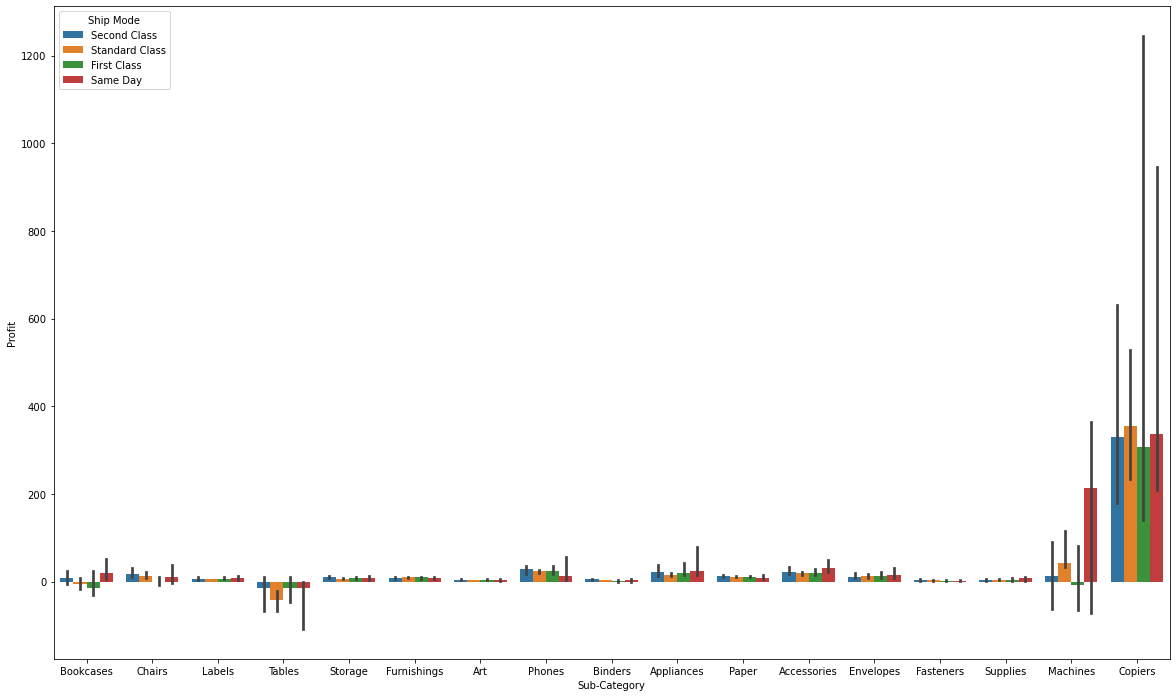

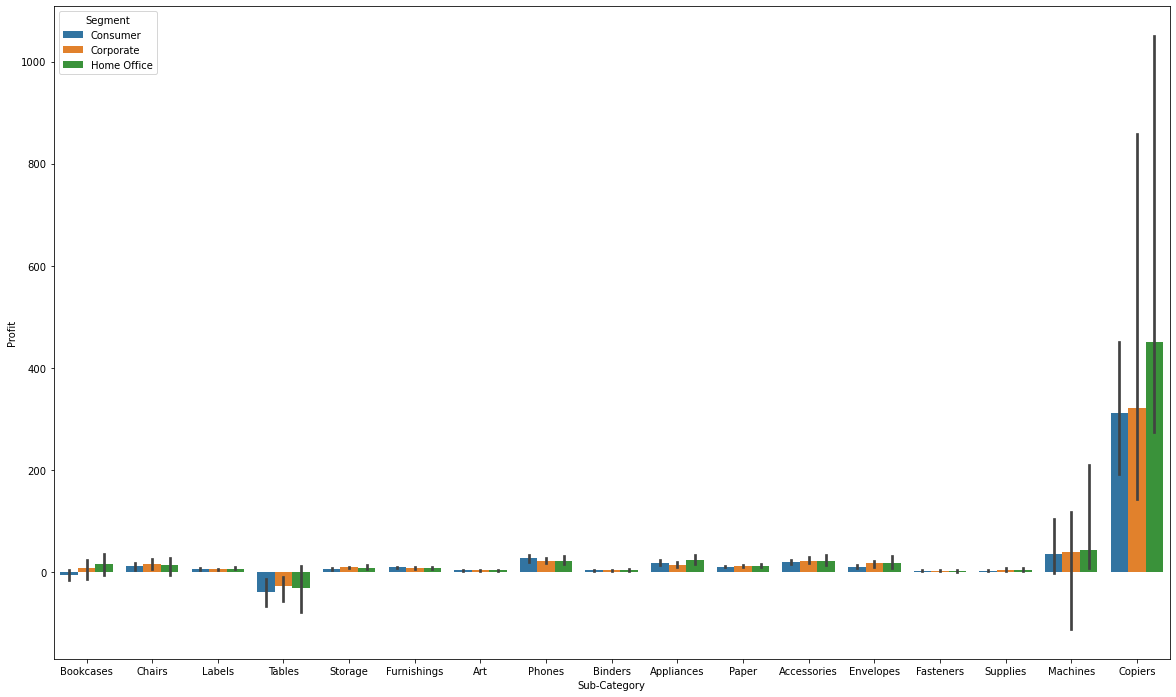

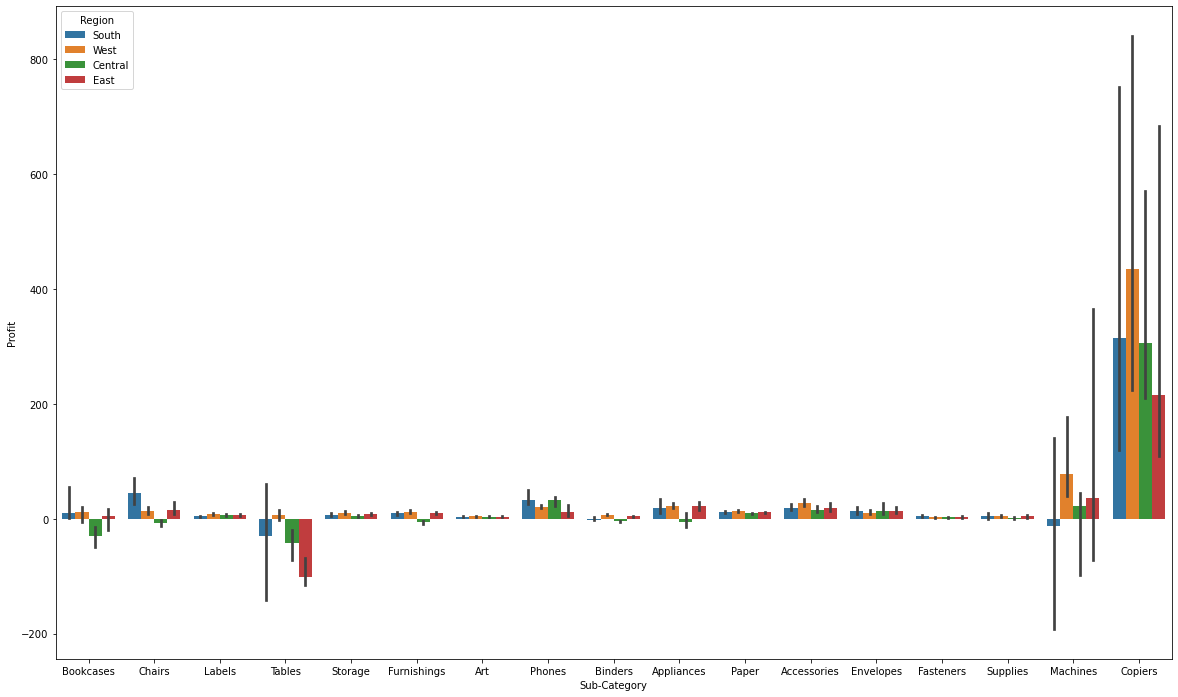

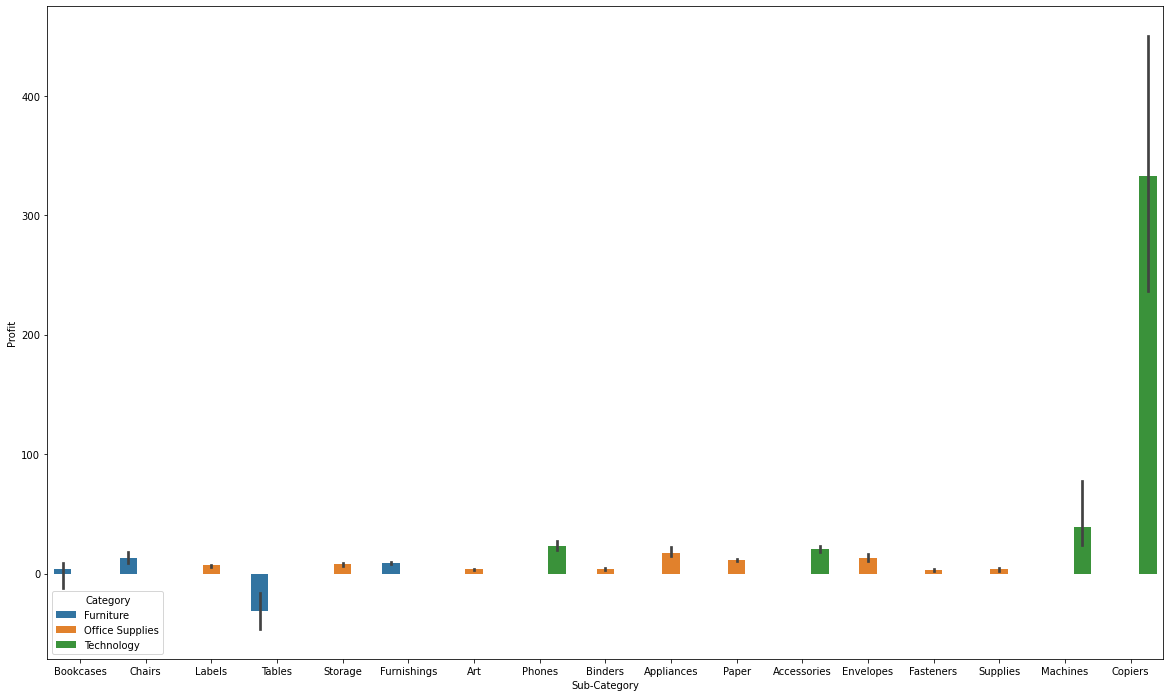

In [23]:
for columns in categorical_columns.drop(['City','State','Product Name','Sub-Category']):
    plt.figure(figsize=(20,12))
    sns.barplot(data=data,x='Sub-Category',y='Profit',hue=columns,estimator=np.median)
    plt.show()

### 
* ### Whatever Region Customer segment Ship mode Machines are very volatile and incuring losses as well as profit which means they are breaking even with the cost while on the other hand 
* ### Copiers have been proven to be profitable across all the dimensions
* ### Looking at others the Sales dont seem to be that high due to which profit margins are very minimal but furnitures are incuring loses

In [24]:
data.groupby('Sub-Category')['Profit'].agg('median')

Sub-Category
Accessories     21.00000
Appliances      17.44650
Art              3.72360
Binders          3.97710
Bookcases        4.13330
Chairs          13.31760
Copiers        332.99420
Envelopes       12.71835
Fasteners        2.84160
Furnishings      9.10200
Labels           6.87140
Machines        38.99740
Paper           11.54320
Phones          23.52480
Storage          7.75700
Supplies         3.95930
Tables         -31.37220
Name: Profit, dtype: float64

In [25]:
data.groupby('Category')['Profit'].agg('median')

Category
Furniture           7.7748
Office Supplies     6.8824
Technology         25.0182
Name: Profit, dtype: float64

In [26]:
data

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,delivery_days
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5


In [27]:
data.groupby('Ship Mode')['Sales'].agg('mean').to_dict()

{'First Class': 228.49702399219765,
 'Same Day': 236.39617863720073,
 'Second Class': 236.0892387660668,
 'Standard Class': 227.58306685656837}

In [28]:
for column in categorical_columns.drop(['City', 'State','Sub-Category', 'Product Name']):
    print(f"The unique items in {column} are {data[column].nunique()}")

The unique items in Ship Mode are 4
The unique items in Segment are 3
The unique items in Region are 4
The unique items in Category are 3


In [29]:
for column in categorical_columns:
    print(f"The unique items in {column} are {data[column].nunique()}")

The unique items in Ship Mode are 4
The unique items in Segment are 3
The unique items in City are 531
The unique items in State are 49
The unique items in Region are 4
The unique items in Category are 3
The unique items in Sub-Category are 17
The unique items in Product Name are 1850


In [30]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,drop='first')
# ohe.fit(data[categorical_columns.drop(['City', 'State','Sub-Category', 'Product Name'])])

In [31]:
# ohe.transform(data[categorical_columns.drop(['City', 'State','Sub-Category', 'Product Name'])])

In [53]:
categorical_columns.drop([ 'City','State','Sub-Category', 'Product Name'])

Index(['Ship Mode', 'Segment', 'Region', 'Category'], dtype='object')

In [32]:
onehotencoded=ohe.fit_transform(data[categorical_columns.drop([ 'City','State','Sub-Category', 'Product Name'])])
columns=ohe.get_feature_names()
data[columns]=onehotencoded
data.drop(categorical_columns.drop(['City','State','Sub-Category', 'Product Name']),axis=1,inplace=True)

In [33]:
# onehotencoded=ohe.fit_transform(data[categorical_columns.drop(['City', 'State','Sub-Category', 'Product Name'])])
# columns=ohe.get_feature_names()
# data[columns]=onehotencoded
# data.drop(categorical_columns.drop(['City', 'State','Sub-Category', 'Product Name']),axis=1,inplace=True)

In [34]:
data

,City,State,Postal Code,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,delivery_days,x0_Same Day,x0_Second Class,x0_Standard Class,x1_Corporate,x1_Home Office,x2_East,x2_South,x2_West,x3_Office Supplies,x3_Technology
0,Henderson,Kentucky,42420,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Henderson,Kentucky,42420,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Los Angeles,California,90036,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Fort Lauderdale,Florida,33311,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Fort Lauderdale,Florida,33311,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Miami,Florida,33180,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9990,Costa Mesa,California,92627,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9991,Costa Mesa,California,92627,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9992,Costa Mesa,California,92627,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [35]:
for column in ['City', 'State','Sub-Category', 'Product Name','Postal Code']:
    print(f"The unique items in {column} are {data[column].nunique()}")

The unique items in City are 531
The unique items in State are 49
The unique items in Sub-Category are 17
The unique items in Product Name are 1850
The unique items in Postal Code are 631


In [36]:
# for column in [ 'State','Sub-Category', 'Product Name','Postal Code']:
#     print(f"The unique items in {column} are {data[column].nunique()}")

### We are left with 4 more categorical and one ordinal column Postal code we will drop them 

In [37]:
for column in ['City','Sub-Category']:
    col_encoded=data.groupby(column)['Sales'].agg('median').sort_values(ascending=True).to_dict()
    data[column]=data[column].map(col_encoded)

In [38]:
# for column in ['Sub-Category']:
#     col_encoded=data.groupby(column)['Sales'].agg('median').sort_values(ascending=True).to_dict()
#     data[column]=data[column].map(col_encoded)

In [39]:
data.drop(['State','Product Name','Postal Code'],axis=1,inplace=True)

In [40]:
data

,City,Sub-Category,Sales,Quantity,Discount,Profit,delivery_days,x0_Same Day,x0_Second Class,x0_Standard Class,x1_Corporate,x1_Home Office,x2_East,x2_South,x2_West,x3_Office Supplies,x3_Technology
0,61.000,306.82025,261.9600,2,0.00,41.9136,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,61.000,362.13600,731.9400,3,0.00,219.5820,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,69.456,14.94000,14.6200,2,0.00,6.8714,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,116.760,447.84000,957.5775,5,0.45,-383.0310,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,116.760,113.92800,22.3680,2,0.20,2.5164,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,37.608,41.96000,25.2480,3,0.20,4.1028,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9990,119.616,41.96000,91.9600,2,0.00,15.6332,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9991,119.616,209.97000,258.5760,2,0.20,19.3932,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9992,119.616,26.72000,29.6000,4,0.00,13.3200,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


<AxesSubplot:xlabel='Sub-Category', ylabel='Density'>

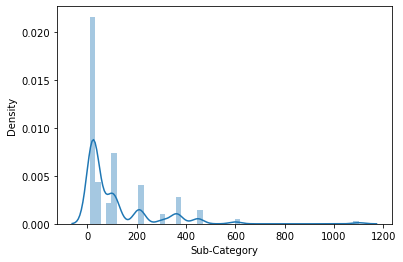

In [41]:
sns.distplot(data['Sub-Category'])

In [42]:
data[['Sales','Profit']]

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164
...,...,...
9989,25.2480,4.1028
9990,91.9600,15.6332
9991,258.5760,19.3932
9992,29.6000,13.3200


In [43]:
X=data.drop(['Sales'],axis=1)
y=data[['Sales']]

In [44]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,Normalizer
from scipy.stats import boxcox
standard=StandardScaler()
robust=RobustScaler()
minmax=MinMaxScaler()
normalize=Normalizer()
# X.iloc[:,:2]=standard.fit_transform(X.iloc[:,:2])

In [45]:
X

,City,Sub-Category,Quantity,Discount,Profit,delivery_days,x0_Same Day,x0_Second Class,x0_Standard Class,x1_Corporate,x1_Home Office,x2_East,x2_South,x2_West,x3_Office Supplies,x3_Technology
0,61.000,306.82025,2,0.00,41.9136,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,61.000,362.13600,3,0.00,219.5820,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,69.456,14.94000,2,0.00,6.8714,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,116.760,447.84000,5,0.45,-383.0310,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,116.760,113.92800,2,0.20,2.5164,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,37.608,41.96000,3,0.20,4.1028,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9990,119.616,41.96000,2,0.00,15.6332,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9991,119.616,209.97000,2,0.20,19.3932,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9992,119.616,26.72000,4,0.00,13.3200,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                9994 non-null   float64
 1   Sub-Category        9994 non-null   float64
 2   Quantity            9994 non-null   int64  
 3   Discount            9994 non-null   float64
 4   Profit              9994 non-null   float64
 5   delivery_days       9994 non-null   int64  
 6   x0_Same Day         9994 non-null   float64
 7   x0_Second Class     9994 non-null   float64
 8   x0_Standard Class   9994 non-null   float64
 9   x1_Corporate        9994 non-null   float64
 10  x1_Home Office      9994 non-null   float64
 11  x2_East             9994 non-null   float64
 12  x2_South            9994 non-null   float64
 13  x2_West             9994 non-null   float64
 14  x3_Office Supplies  9994 non-null   float64
 15  x3_Technology       9994 non-null   float64
dtypes: flo

In [47]:
def plot_curve(df,column):
    fig,axes=plt.subplots(2,4,figsize=(20,10))
    fig.suptitle(f"plot for {column}")
    sns.axisgrid
    sns.distplot(ax=axes[0,0],a=df[column],axlabel='normal')
    sns.distplot(ax=axes[0,1],a=np.log1p(df[column]),axlabel='logarithmic')
    sns.distplot(ax=axes[0,2],a=(df[column])**(1/2),axlabel='sqrt')
    sns.distplot(ax=axes[0,3],a=boxcox(df[column]+.01)[0],axlabel='boxcox')
    # sns.distplot(ax=axes[0,3],a=normalize.fit_transform(df[[column]]),axlabel='normalize')
    sns.distplot(ax=axes[1,0],a=1/(df[column]+.01),axlabel='reciprocal')
    sns.distplot(ax=axes[1,1],a=robust.fit_transform(df[[column]]),axlabel='robustscaler')
    sns.distplot(ax=axes[1,2],a=minmax.fit_transform(df[[column]]),axlabel='minmaxscaler')
    sns.distplot(ax=axes[1,3],a=standard.fit_transform(df[[column]]),axlabel='standardscaler')   

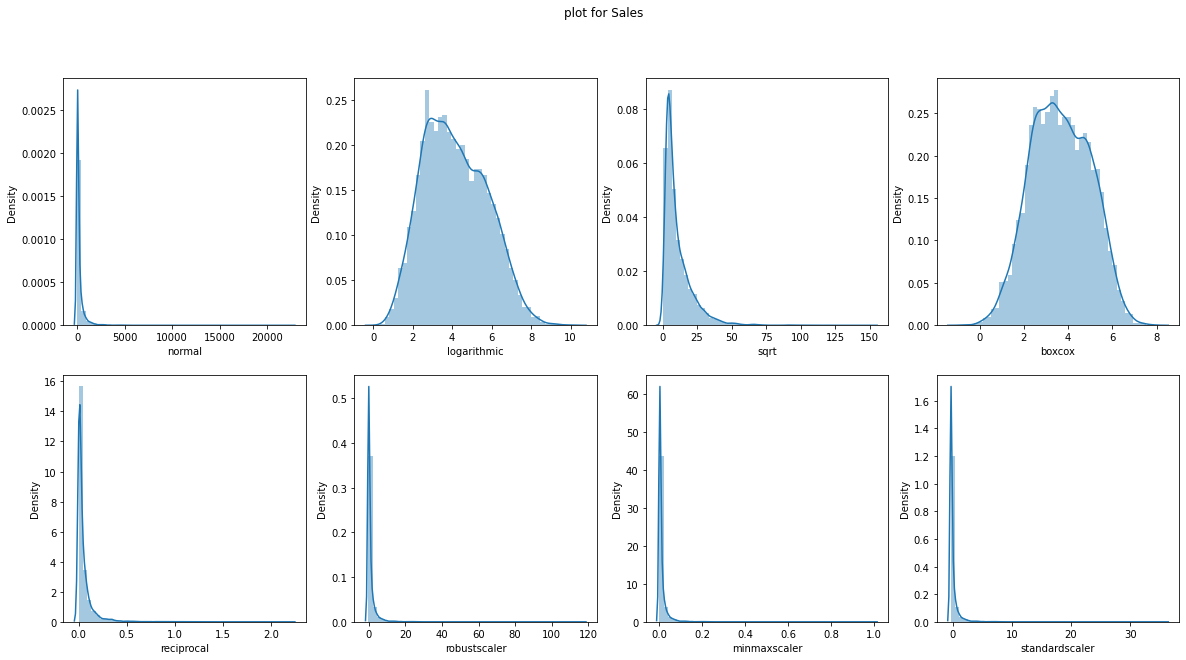

In [48]:
for columns in y:
    plot_curve(y,columns)
    # y[columns]=np.log1p(y[columns])

In [49]:
X.columns

Index(['City', 'Sub-Category', 'Quantity', 'Discount', 'Profit',
       'delivery_days', 'x0_Same Day', 'x0_Second Class', 'x0_Standard Class',
       'x1_Corporate', 'x1_Home Office', 'x2_East', 'x2_South', 'x2_West',
       'x3_Office Supplies', 'x3_Technology'],
      dtype='object')

ValueError: Data must be positive.

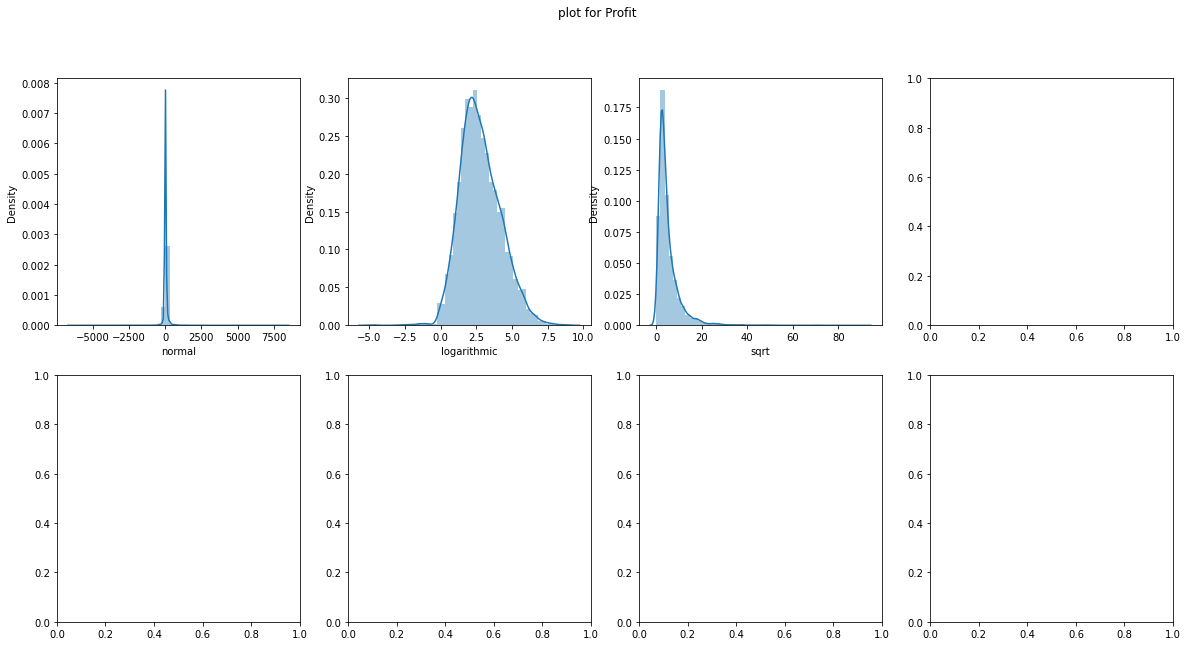

In [50]:
plot_curve(X,'Profit')

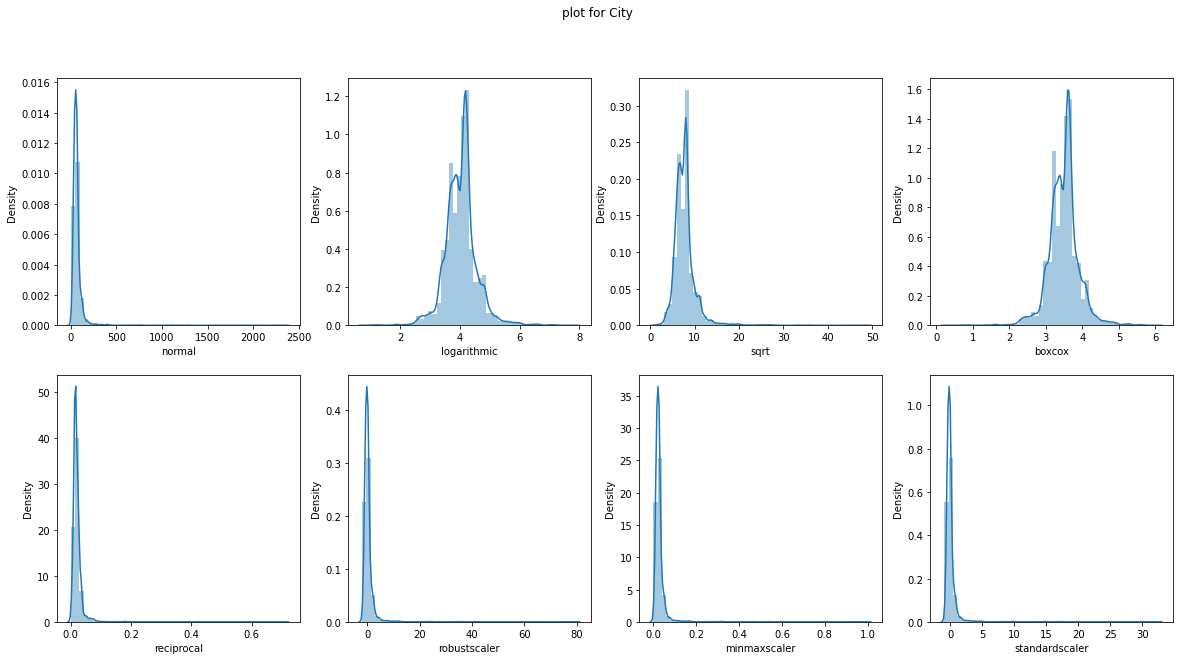

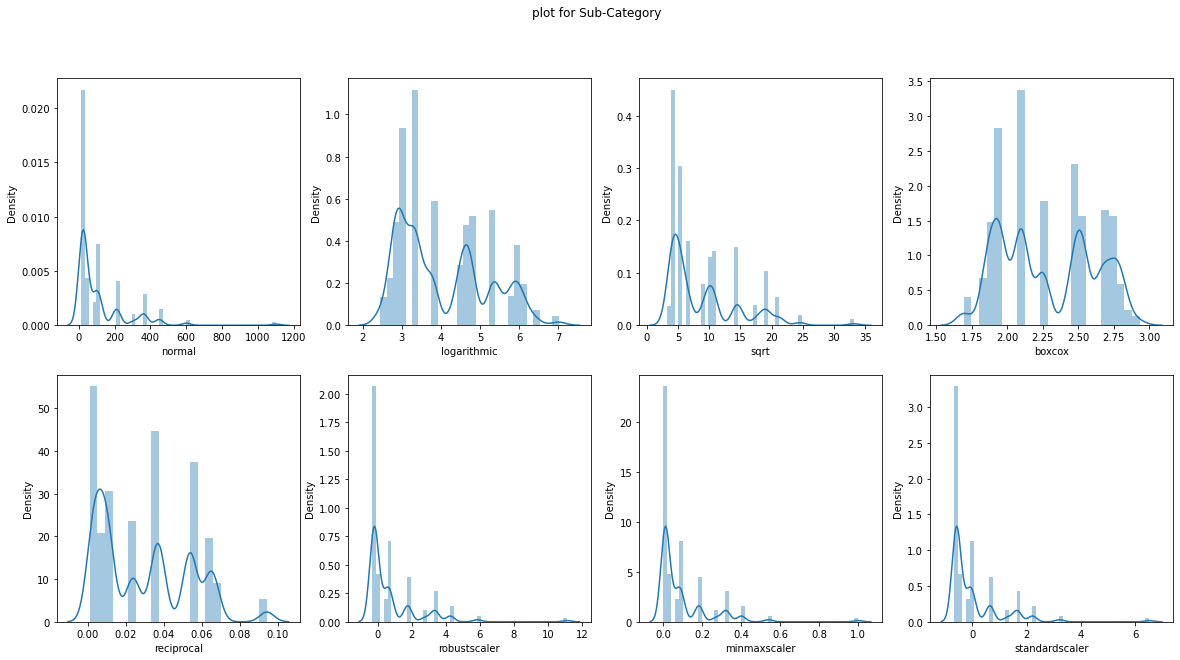

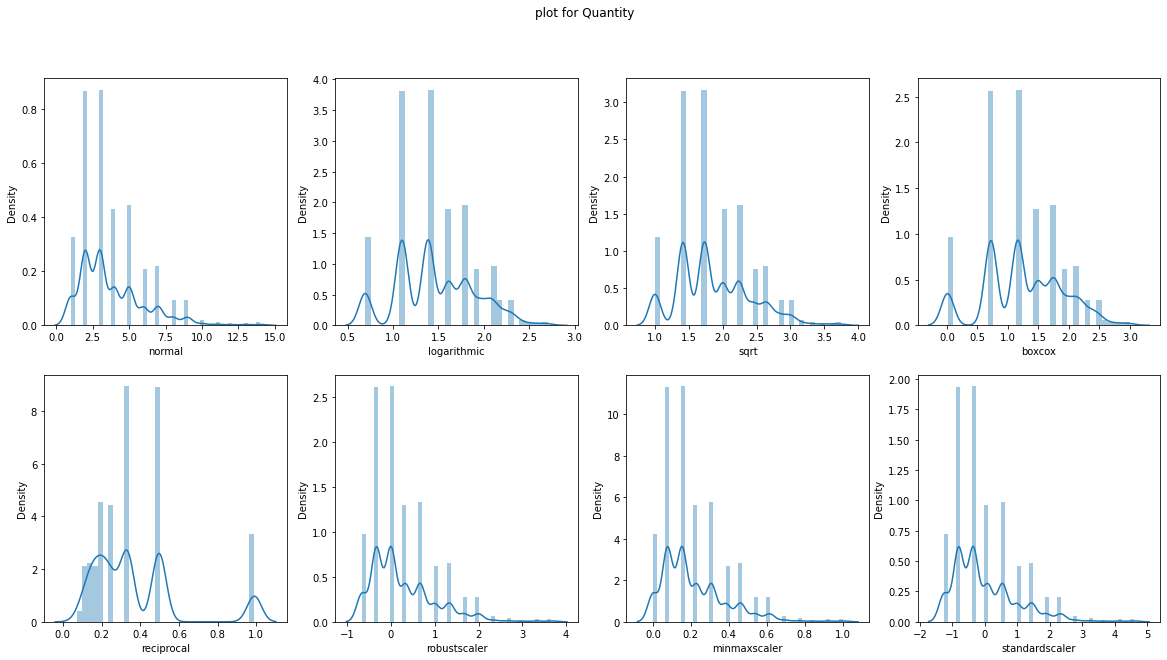

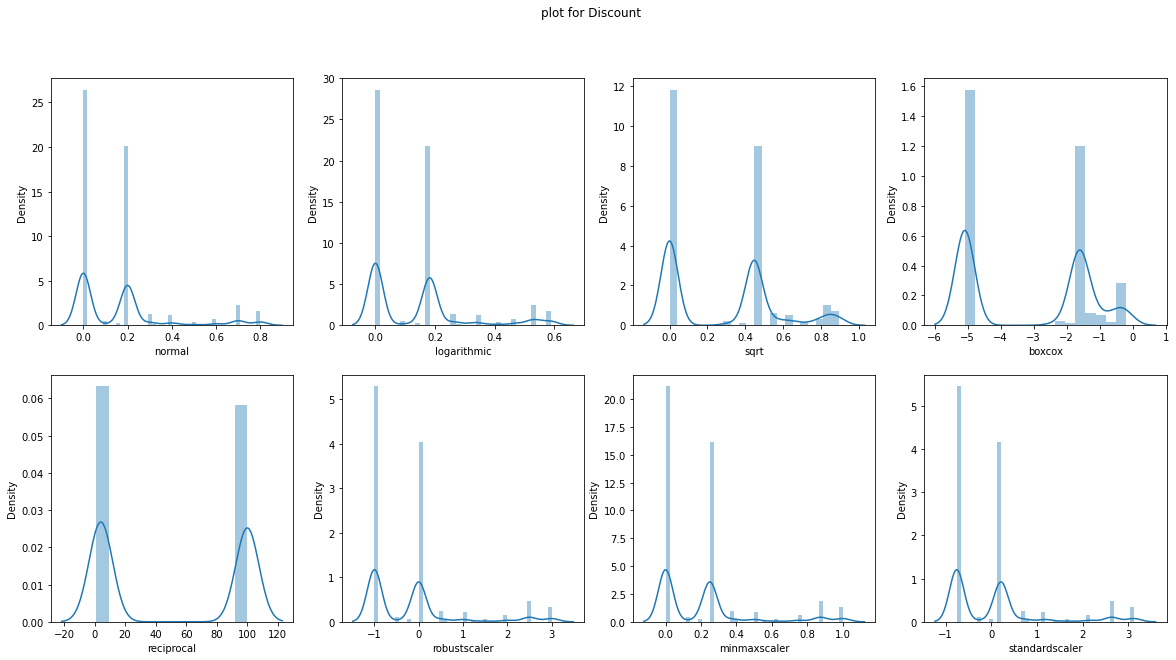

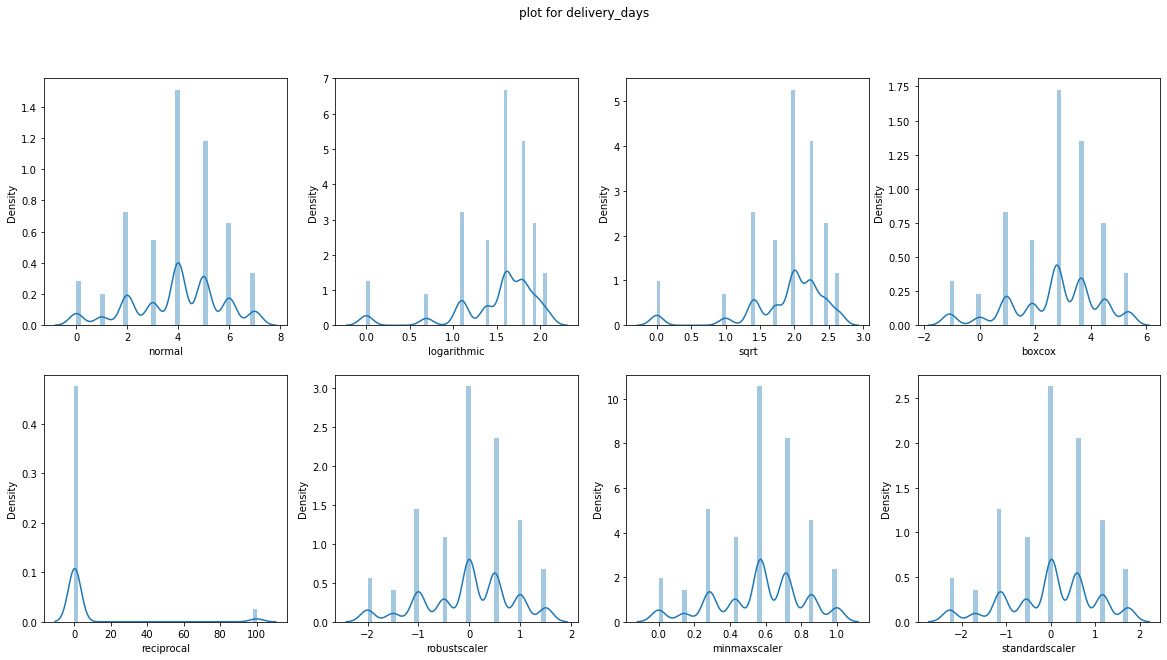

In [54]:
for columns in ['City', 'Sub-Category', 'Quantity', 'Discount','delivery_days']:
    plot_curve(X,columns)

In [55]:
X.iloc[:,:5].drop(['Quantity','Profit','Discount'],axis=1).columns

Index(['City', 'Sub-Category'], dtype='object')

<AxesSubplot:xlabel='Profit', ylabel='Density'>

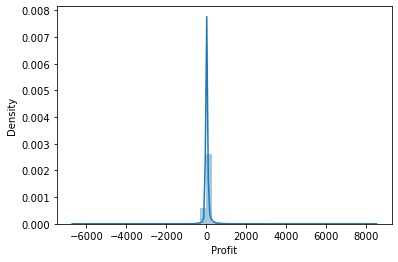

In [56]:
sns.distplot(X['Profit'])

In [57]:
IQR=X['Profit'].quantile(0.75)-X['Profit'].quantile(0.25)
IQR

27.635249999999996

In [58]:
X['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [59]:
upper_threshold=X['Profit'].median()+90*IQR
lower_threshold=X['Profit'].median()-90*IQR
upper_threshold,lower_threshold

(2495.8389999999995, -2478.506)

In [60]:
X['Profit']=np.where(X['Profit']>upper_threshold,upper_threshold,X['Profit'])
X['Profit']=np.where(X['Profit']<lower_threshold,lower_threshold,X['Profit'])

In [53]:
# for columns in X.iloc[:,:5].columns:
#     X[columns]=minmax.fit_transform(X[[columns]])

In [61]:
for columns in X.iloc[:,:5].drop(['Quantity','Profit','Discount'],axis=1).columns:
    X[columns]=np.log1p(X[columns])

<AxesSubplot:ylabel='Density'>

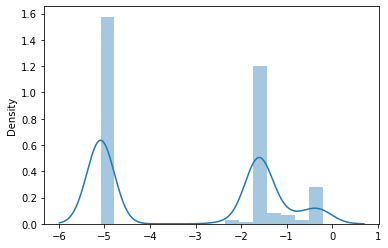

In [62]:
sns.distplot(boxcox(X['Discount']+0.01)[0])

In [63]:
X['Discount']=boxcox(X['Discount']+0.01)[0]

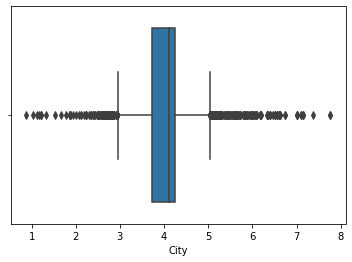

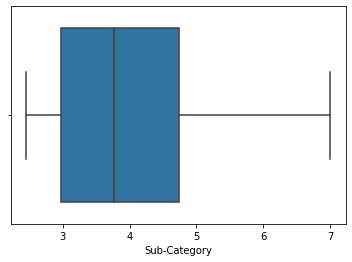

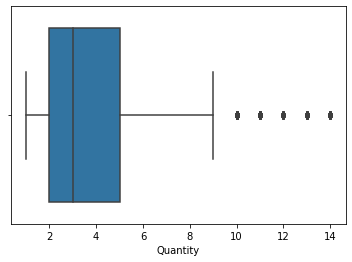

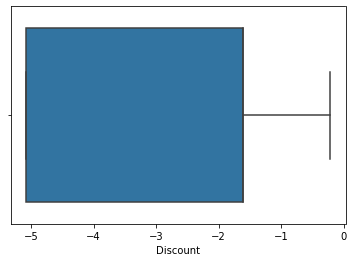

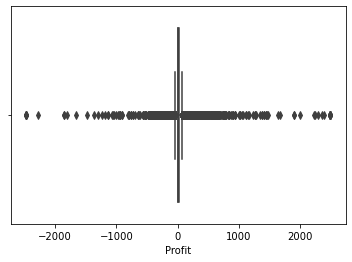

In [64]:
for columns in X.iloc[:,:5]:
    sns.boxplot(X[columns])
    plt.show()

<AxesSubplot:xlabel='Sales'>

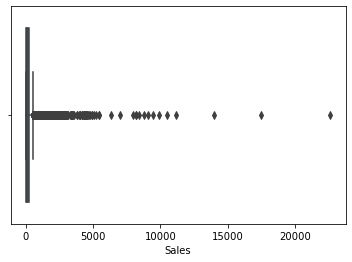

In [65]:
sns.boxplot(y['Sales'])

In [66]:
IQR=y.quantile(0.75)-y.quantile(0.25)
IQR

Sales    192.66
dtype: float64

In [67]:
upper_threshold=y.median()+3*IQR
lower_threshold=y.median()-3*IQR
upper_threshold,lower_threshold

(Sales    632.47
 dtype: float64,
 Sales   -523.49
 dtype: float64)

In [68]:
upper_boundary=y.mean()+6*y.std()
upper_boundary

Sales    3969.328604
dtype: float64

In [69]:
y['Sales']=np.where(y>upper_boundary,upper_boundary,y)

In [70]:
X

,City,Sub-Category,Quantity,Discount,Profit,delivery_days,x0_Same Day,x0_Second Class,x0_Standard Class,x1_Corporate,x1_Home Office,x2_East,x2_South,x2_West,x3_Office Supplies,x3_Technology
0,4.127134,5.729516,2,-5.083668,41.9136,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4.127134,5.894777,3,-5.083668,219.5820,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4.254988,2.768832,2,-5.083668,6.8714,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,4.768649,6.106666,5,-0.789407,-383.0310,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.768649,4.744306,2,-1.613246,2.5164,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,3.653460,3.760269,3,-1.613246,4.1028,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9990,4.792612,3.760269,2,-5.083668,15.6332,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9991,4.792612,5.351716,2,-1.613246,19.3932,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9992,4.792612,3.322154,4,-5.083668,13.3200,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [72]:
pca.explained_variance_ratio_

array([9.99535528e-01, 1.55801197e-04, 1.10222134e-04, 1.01166930e-04,
       4.46111481e-05, 9.98073475e-06, 7.78076509e-06, 7.52339708e-06,
       6.78366851e-06, 6.12854784e-06, 4.56722874e-06, 3.66270436e-06,
       2.13985887e-06, 1.75702774e-06, 1.33758153e-06, 1.00946154e-06])

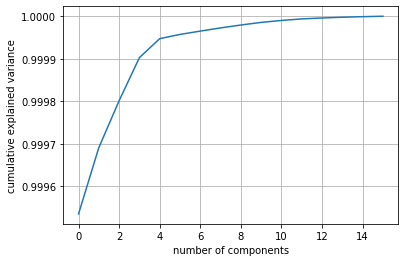

In [71]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [73]:
pca=PCA(n_components=10,random_state=42)
pca.fit(X)
X_pca=pca.transform(X)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [75]:
linear=LinearRegression()
model=MultiOutputRegressor(linear)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.3455322808190421

In [76]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import cross_val_score,cross_val_predict
linear=LinearRegression()
mse=cross_val_score(model,X_train,y_train,scoring='r2',cv=5)
mse_=np.mean(mse)
mse_

0.41374644015261824

In [77]:
y_pred

array([[384.6466779 ],
       [-30.26845965],
       [ 25.92983847],
       ...,
       [ 87.63067517],
       [330.40900654],
       [174.57767374]])

In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(X_train,y_train)
ridge_regressor.best_params_,ridge_regressor.best_score_

({'alpha': 100}, 0.41402282375240923)

In [79]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)
lasso_regressor.fit(X_train,y_train)
lasso_regressor.best_params_,lasso_regressor.best_score_

({'alpha': 1}, 0.4140365572736395)

In [80]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [81]:
from sklearn.tree import DecisionTreeRegressor
import xgboost
decision=DecisionTreeRegressor()
boost=xgboost.XGBRegressor()

In [82]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
}

In [83]:
decision_test=RandomizedSearchCV(boost,param_distributions=params,n_iter=10,\
                                 scoring='r2',n_jobs=-1,cv=5,verbose=5,)

In [84]:
decision_test.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__objective', 'estimator__base_score', 'estimator__booster', 'estimator__colsample_bylevel', 'estimator__colsample_bynode', 'estimator__colsample_bytree', 'estimator__enable_categorical', 'estimator__gamma', 'estimator__gpu_id', 'estimator__importance_type', 'estimator__interaction_constraints', 'estimator__learning_rate', 'estimator__max_delta_step', 'estimator__max_depth', 'estimator__min_child_weight', 'estimator__missing', 'estimator__monotone_constraints', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__num_parallel_tree', 'estimator__predictor', 'estimator__random_state', 'estimator__reg_alpha', 'estimator__reg_lambda', 'estimator__scale_pos_weight', 'estimator__subsample', 'estimator__tree_method', 'estimator__validate_parameters', 'estimator__verbosity', 'estimator', 'n_iter', 'n_jobs', 'param_distributions', 'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [85]:
decision_test.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                   

In [86]:
decision_test.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=3, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [87]:
decision_test.best_params_

{'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.3,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [88]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=3, min_child_weight=7, missing=np.nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [89]:
xgboost_score=cross_val_score(boost,X_train,y_train,cv=10)
xgboost_score

array([0.87712108, 0.76819309, 0.86016667, 0.88519644, 0.81634683,
       0.85269906, 0.79746373, 0.88081579, 0.8609351 , 0.76975094])

In [90]:
xgboost_score.mean()

0.8368688728006981

In [91]:
xgboost_test=boost.fit(X_train,y_train)

In [92]:
xgboost_pred=xgboost_test.predict(X_test)
xgboost_pred

array([348.40445 ,  29.07379 ,  61.434242, ...,  22.858088, 282.1047  ,
       114.68215 ], dtype=float32)

In [93]:
r2_score(y_test,xgboost_pred)

0.8405009520513738

In [94]:
param={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
}

In [95]:
decision.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [96]:
decision_tree=cross_val_score(decision,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
decision_tree

array([ -41397.55032907, -106157.27514962,  -39811.64864206,
        -68750.23889502,  -27100.62450536,  -75605.43332811,
        -53185.46378374,  -55952.36338628,  -52433.34859136,
        -81300.18544678])

In [97]:
-decision_tree.mean()

60169.41320574022

In [98]:
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
adaboost=AdaBoostRegressor()
bagging=BaggingRegressor()
gradient=GradientBoostingRegressor()
random_=RandomForestRegressor()

In [99]:
adaboost_test=cross_val_score(adaboost,X_train,y_train,cv=10,scoring='r2')
bagging_test=cross_val_score(bagging,X_train,y_train,cv=10,scoring='r2')
gradient_test=cross_val_score(gradient,X_train,y_train,cv=10,scoring='r2')
random_test=cross_val_score(random_,X_train,y_train,cv=10,scoring='r2')

In [100]:
adaboost_test.mean(),bagging_test.mean(),gradient_test.mean(),random_test.mean()

(0.41769131664571857,
 0.8211381826096993,
 0.8375813904656523,
 0.8393728039781226)

In [101]:
gradient_test=gradient.fit(X_train,y_train)

In [102]:
gradient_pred=gradient_test.predict(X_test)

In [103]:
r2_score(y_test,gradient_pred)

0.8465682512505548

In [115]:
final_df=y_test.merge(pd.DataFrame(xgboost_pred,index=y_test.index,columns={'Sales':0}),on=y_test.index)
final_df.set_index('key_0').rename_axis('')

,Sales_x,Sales_y
,,
3125,563.808,348.404449
1441,36.672,29.073790
4510,37.300,61.434242
39,212.058,302.889709
4509,171.288,296.799530
...,...,...
9063,322.192,267.505066
2603,136.784,78.294106
6112,16.752,22.858088


In [105]:
from sklearn import svm
svm_reg=svm.SVR(kernel='linear',C=1)

In [106]:
svm_test= svm_reg.fit(X_train, y_train)

In [107]:
svm_test.score(X_test,y_test)

0.06707913110407426

In [108]:
svm_scores=cross_val_score(svm_reg,X_train,y_train,cv=10)

In [109]:
svm_scores.mean()

0.17814817635383493

In [110]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)

In [111]:
knn_test=knn.fit(X_train,y_train)
knn_test.score(X_train,y_train)

0.7908177112522918

In [112]:
knn_pred=knn_test.predict(X_test)

In [113]:
r2_score(y_test,knn_pred)

0.7393828797252753

In [116]:
accuracy_rate=[]

for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    score=r2_score(y_test,pred_i)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

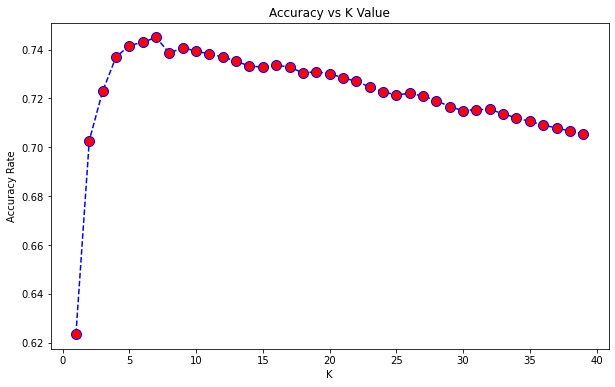

In [117]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')